# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT DATA

In [3]:
#CHANGE folder  
os.chdir("/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/AutonomousScenario/Conventional_Charge_Night_Battery_Conditions")

if True: # Load all csv files in directory and concat just once 
    extension = 'csv'

    # Autonomous Bike trips
    autonomousBike_trips_filenames = [i for i in glob.glob('autonomousBike_trip_event*.{}'.format(extension))]
    autonomousBike_trips_df_temp= pd.concat([pd.read_csv(f) for f in autonomousBike_trips_filenames ])
    
    # Autonomous Bike charging
    autonomousBike_charging_filenames = [i for i in glob.glob('AutonomousBike_station_charge*.{}'.format(extension))]
    autonomousBike_charging_df_temp= pd.concat([pd.read_csv(f) for f in autonomousBike_charging_filenames ])
    
    # Autonomous Bike roads traveled
    autonomousBike_roads_filenames = [i for i in glob.glob('AutonomousBike_roadstraveled*.{}'.format(extension))]
    autonomousBike_roads_df_temp= pd.concat([pd.read_csv(f) for f in autonomousBike_roads_filenames ])
    
    # Package events
    package_events_filenames =[i for i in glob.glob('package_event*.{}'.format(extension))]
    package_events_df_temp= pd.concat([pd.read_csv(f) for f in package_events_filenames ])
    
    # Package trips
    package_trips_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]
    package_trips_df_temp= pd.concat([pd.read_csv(f) for f in package_trips_filenames ])

filepath_demand = "/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/"
demand_df = pd.read_csv(filepath_demand + 'fooddeliverytrips_cambridge.csv')

In [4]:
# Prepare DataFrames
autonomousBike_trips_df=autonomousBike_trips_df_temp.copy()
autonomousBike_charging_df=autonomousBike_charging_df_temp.copy()
autonomousBike_roads_df=autonomousBike_roads_df_temp.copy()
package_events_df=package_events_df_temp.copy()
package_trips_df=package_trips_df_temp.copy()

In [5]:
autonomousBike_trips_df = autonomousBike_trips_df.sort_values(by=['Num Autonomous Bikes','AB PickUp Speed','Time'])
autonomousBike_trips_df['AB PickUp Speed'] = autonomousBike_trips_df['AB PickUp Speed'].round(6)
autonomousBike_charging_df = autonomousBike_charging_df.sort_values(by=['Num Autonomous Bikes','AB PickUp Speed','Time'])
autonomousBike_charging_df['AB PickUp Speed'] = autonomousBike_charging_df['AB PickUp Speed'].round(6)
autonomousBike_roads_df = autonomousBike_roads_df.sort_values(by=['Num Autonomous Bikes','AB PickUp Speed','Time'])
autonomousBike_roads_df['AB PickUp Speed'] = autonomousBike_roads_df['AB PickUp Speed'].round(6)
package_events_df = package_events_df.sort_values(by=['Num Autonomous Bikes','AB PickUp Speed','Time'])
package_events_df['AB PickUp Speed'] = package_events_df['AB PickUp Speed'].round(6)
package_trips_df = package_trips_df.sort_values(by=['Num Autonomous Bikes','AB PickUp Speed','Time'])
package_trips_df['AB PickUp Speed'] = package_trips_df['AB PickUp Speed'].round(6)

# READ DATA

In [ ]:
print("---Autonomous Bike Trips---")
autonomousBike_trips_df.head(3)

In [ ]:
print("---Autonomous Bike Charging Trips---")
autonomousBike_charging_df.head(3)

In [ ]:
print("---Autonomous Bike Roads Traveled---")
autonomousBike_roads_df.head(3)

In [2]:
print("---Autonomous Bike Package Events---")
package_events_df.head(3)

---Autonomous Bike Package Events---


NameError: ignored

In [3]:
print("---Autonomous Bike Package Trips---")
package_trips_df.head(3)

---Autonomous Bike Package Trips---


NameError: ignored

# ANALYZE RESULTS

## Package Events || Trips Served

### Initialization of Parameters

In [6]:
# Initialize number of Autonomous Bikes possible
n_autonomousBikes_possible=package_trips_df['Num Autonomous Bikes'].unique()
n_autonomousBikes_possible.sort()
l_n_autonomousBikes=len(n_autonomousBikes_possible)

In [7]:
# Initialize Served Trips DataFrame
served_trips_df = pd.DataFrame(n_autonomousBikes_possible)
served_trips_df=served_trips_df.rename(columns={0: "Num Autonomous Bikes"}, errors="raise")
served_trips_df['% trips served']=' '

In [8]:
#Initialize speed possible
n_pickupspeed_possible=package_trips_df['AB PickUp Speed'].unique()
n_pickupspeed_possible.sort()
l_n_pickupspeed_possible = len(n_pickupspeed_possible)

In [9]:
# Initialize battery life possible
n_batterylife_possible=package_trips_df['Autonomous Bikes Battery Life'].unique()
n_batterylife_possible.sort()
l_n_batterylife_possible = len(n_batterylife_possible)

### Number of Autonomous Bikes in X Axis

In [10]:
n_autonomousBikes_possible_df=pd.DataFrame(n_autonomousBikes_possible)
aux_array_nab = pd.array(['Event Description / Number of Autonomous Bikes'])
aux_array_nab_df = pd.DataFrame(aux_array_nab)
aux_array_nab_df = pd.concat([aux_array_nab_df,n_autonomousBikes_possible_df])
aux_array_nab_df = aux_array_nab_df.rename(columns={0: "Index"}, errors="raise")

In [11]:
package_events_analysis_nab_df = pd.DataFrame(columns=aux_array_nab_df['Index'])
package_events_analysis_nab_df['Event Description / Number of Autonomous Bikes']=package_events_df['Event'].unique()
package_events_analysis_nab_df.at[13,'Event Description / Number of Autonomous Bikes'] = 'Percentage of trips served: '

In [12]:
minimum_fleet_service_list = ['Battery Life','Speed','Num Autonomous Bikes']
minimum_fleet_service_df = pd.DataFrame(columns=minimum_fleet_service_list)
mf_service_cont = 0

Minimum fleet to serve 100% of the trips: 230  autonomous bike with  35.0 km battery life and  PickUp & Riding Speed 8.0 km/h
Minimum fleet to serve 100% of the trips: 210  autonomous bike with  35.0 km battery life and  PickUp & Riding Speed 11.0 km/h
Minimum fleet to serve 100% of the trips: 210  autonomous bike with  35.0 km battery life and  PickUp & Riding Speed 14.0 km/h
Minimum fleet to serve 100% of the trips: 190  autonomous bike with  50.0 km battery life and  PickUp & Riding Speed 8.0 km/h
Minimum fleet to serve 100% of the trips: 150  autonomous bike with  50.0 km battery life and  PickUp & Riding Speed 11.0 km/h
Minimum fleet to serve 100% of the trips: 160  autonomous bike with  50.0 km battery life and  PickUp & Riding Speed 14.0 km/h
Minimum fleet to serve 100% of the trips: 180  autonomous bike with  65.0 km battery life and  PickUp & Riding Speed 8.0 km/h
Minimum fleet to serve 100% of the trips: 160  autonomous bike with  65.0 km battery life and  PickUp & Riding Spe

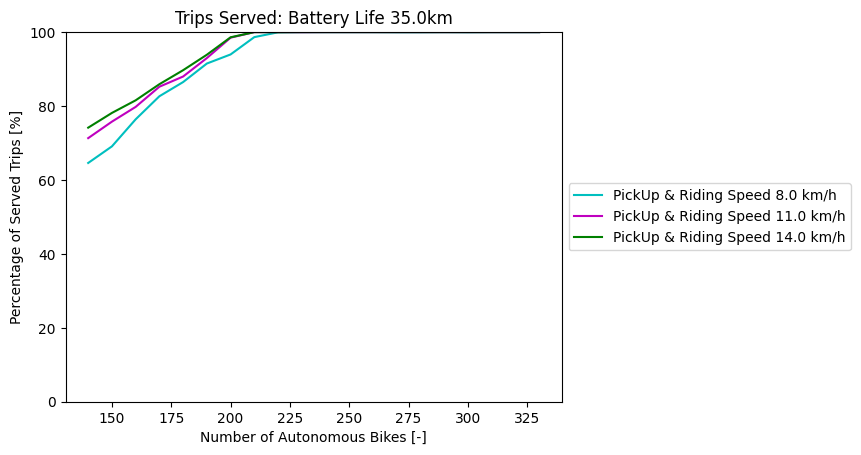

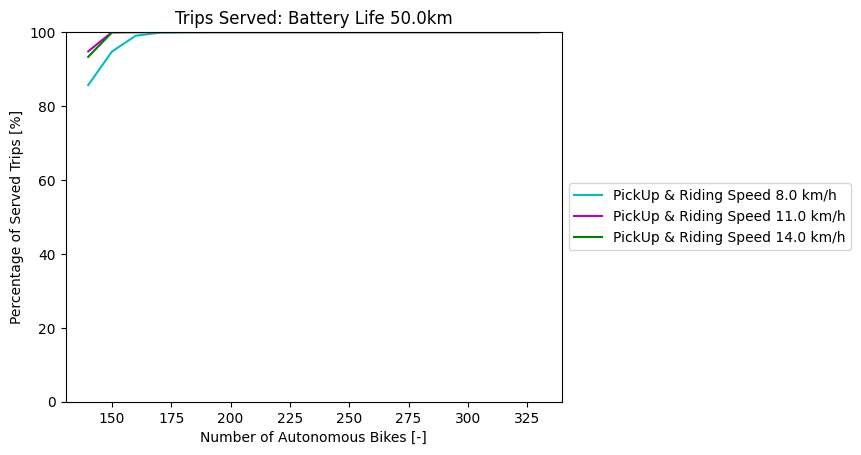

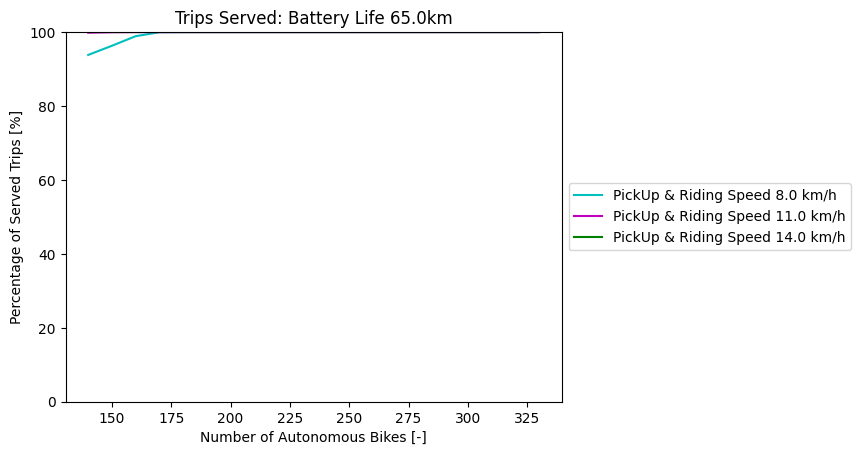

In [13]:
for k in range(l_n_batterylife_possible):
  plt.figure()
  for i in range(l_n_pickupspeed_possible):
    for j in range (l_n_autonomousBikes):
      p_trips = package_events_df[(package_events_df['Num Autonomous Bikes']==n_autonomousBikes_possible[j]) & (package_events_df['AB PickUp Speed']==n_pickupspeed_possible[i]) & (package_events_df['Autonomous Bikes Battery Life']==n_batterylife_possible[k])]
      lp_trips = len(p_trips)

      li = list(p_trips['Agent'].value_counts())

      events_count = p_trips['Event'].value_counts()
      events_count = pd.DataFrame(events_count).reset_index()
      events_count = events_count.rename(columns={"index": "Event Description / Number of Autonomous Bikes"}, errors="raise")
    
      trips_served = events_count.at[12,'Event']
      total_trips = len(li)
      p_trips_served = trips_served/total_trips*100

      events_count.at[13,'Event Description / Number of Autonomous Bikes'] = 'Percentage of trips served: '
      events_count.at[13,'Event'] = p_trips_served

      served_trips_df.at[j,'% trips served'] = p_trips_served

      package_events_analysis_nab_df[n_autonomousBikes_possible[j]]=events_count['Event']
      package_events_analysis_nab_df=package_events_analysis_nab_df.round(2)

      p_events_transp = package_events_analysis_nab_df.transpose()
      p_events_transp = p_events_transp.reset_index()

      headers = p_events_transp.iloc[0]
      new_p_events_transp  = pd.DataFrame(p_events_transp.values[1:], columns=headers)

    package_aux = new_p_events_transp[['Event Description / Number of Autonomous Bikes','Percentage of trips served: ']]
    name_aux = "PickUp & Riding Speed " + str((n_pickupspeed_possible[i]*3.6).round(2)) + " km/h"
    package_aux = package_aux.rename(columns={"Percentage of trips served: ": name_aux}, errors="raise")

    if i>0:
      extracted_col = package_aux[name_aux]
      trips_served_df = trips_served_df.join(extracted_col)
    else:
      trips_served_df = package_aux

    for j in range (l_n_autonomousBikes):
      if trips_served_df.at[j,name_aux]==100:
        fleet_serve = trips_served_df.at[j,'Event Description / Number of Autonomous Bikes']
        break

    minimum_fleet_service_df.at[mf_service_cont,'Battery Life'] = n_batterylife_possible[k]
    minimum_fleet_service_df.at[mf_service_cont,'Speed'] = (n_pickupspeed_possible[i]*3.6).round(2)
    minimum_fleet_service_df.at[mf_service_cont,'Num Autonomous Bikes'] = fleet_serve
    mf_service_cont = mf_service_cont + 1
    
    print('Minimum fleet to serve 100% of the trips:', fleet_serve, ' autonomous bike with ', str(n_batterylife_possible[k]/1000) , "km battery life and ", name_aux)

    if i==0:
      color = 'c'
    elif i==1:
      color = 'm'
    else:
      color = 'g'

    plt.plot(trips_served_df['Event Description / Number of Autonomous Bikes'],trips_served_df[name_aux],'-',color=color,label="PickUp & Riding Speed " + str( (n_pickupspeed_possible[i]*3.6).round(2)) + " km/h")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
    title_aux = "Trips Served: Battery Life " + str(n_batterylife_possible[k]/1000) + "km" 
    plt.title(title_aux)
    plt.xlabel('Number of Autonomous Bikes [-]') 
    plt.ylim([0, 100]) 
    plt.ylabel('Percentage of Served Trips [%]') 

  #   line,=plt.plot(trips_served_df['Event Description / Number of Autonomous Bikes'],trips_served_df[name_aux])
  #   line.set_label(name_aux)
  #   plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

  # title_aux = "Trips Served: Battery Life " + str(n_batterylife_possible[k]/1000) + "km"
  # plt.ylim([0, 100]) 
  # plt.title(title_aux)
  # plt.xlabel('Number of Autonomous Bikes [-]') 
  # plt.ylabel('Percentage of Trips Served [%]') 

## Package Events || Quality of the Service

### Initialization

In [14]:
# Add column of TOTAL waiting time = pick up time + delivery time
package_trips_df['Total Time (min)']=package_trips_df['Wait Time (min)']+package_trips_df['Duration (min)']

In [15]:
# Generate the quality of the service DataFrame
quality_of_service_list = ['Num Autonomous Bikes','PickUp Speed','Total packages','Total trips','On time trips','% On time trips','Late trips','% Late trips','Max wait time','Min wait time','Average wait time','Standard Deviation','Median wait time','Average pick-up time','Average delivery time']
quality_of_service_df = pd.DataFrame(columns=quality_of_service_list)

### Number of Autonomous Bikes in X Axis

#### Preliminary Code

In [16]:
awt_df = {}
apuwt_df = {}
adwt_df = {}
sd_df = {}
lt_df = {}
mwt_df = {}

In [17]:
for k in range(l_n_batterylife_possible):  
  for i in range(l_n_pickupspeed_possible):
    for j in range(l_n_autonomousBikes):
      p_trips=package_trips_df[(package_trips_df['Num Autonomous Bikes']==n_autonomousBikes_possible[j]) & (package_trips_df['AB PickUp Speed']==n_pickupspeed_possible[i]) & (package_trips_df['Autonomous Bikes Battery Life']==n_batterylife_possible[k])]
      l_trips=len(p_trips)
      l_packages = len(package_events_df['Agent'].unique())

      quality_of_service_df.at[j,'Num Autonomous Bikes']=n_autonomousBikes_possible[j]
      quality_of_service_df.at[j,'PickUp Speed'] = n_pickupspeed_possible[i]
      quality_of_service_df.at[j,'Total packages'] = len(package_events_df['Agent'].unique())
      quality_of_service_df.at[j,'Total trips'] = l_trips

      package_trips_ontime = p_trips.loc[(p_trips['Total Time (min)']<= 40)]
      package_trips_late = p_trips.loc[(p_trips['Total Time (min)']> 40)]

      quality_of_service_df.at[j,'On time trips'] = package_trips_ontime.shape[0]
      quality_of_service_df.at[j,'Late trips'] = package_trips_late.shape[0]

      ontime_pct=package_trips_ontime.shape[0]/l_trips*100
      late_pct=package_trips_late.shape[0]/l_trips*100

      quality_of_service_df.at[j,'% On time trips'] = ontime_pct
      quality_of_service_df.at[j,'% Late trips'] = late_pct

      total_wait= p_trips['Total Time (min)'].sum()
      average_wait=total_wait/(p_trips.shape[0])
      median_wait=statistics.median(p_trips['Total Time (min)'])

      total_pickup_wait = p_trips['Wait Time (min)'].sum()
      average_pickup_wait = total_pickup_wait/(p_trips.shape[0])
      average_delivery_wait = average_wait-average_pickup_wait

      quantile_series = p_trips['Total Time (min)'].sort_values().reset_index().drop('index',axis=1)

      quality_of_service_df.at[j,'Average wait time'] = average_wait
      # quality_of_service_df.at[j,'Median wait time'] = median_wait
      # quality_of_service_df.at[j,'Max wait time'] = p_trips['Total Time (min)'].max()
      # quality_of_service_df.at[j,'Min wait time'] = p_trips['Total Time (min)'].min()
      quality_of_service_df.at[j,'0 percentile wait time'] = np.percentile(quantile_series, 0)
      quality_of_service_df.at[j,'95 percentile wait time'] = np.percentile(quantile_series, 95)
      # quality_of_service_df.at[j,'Standard Deviation'] = p_trips['Total Time (min)'].std()
      quality_of_service_df.at[j,'Average pick-up time'] = average_pickup_wait
      # quality_of_service_df.at[j,'Average delivery time'] = average_delivery_wait

      quality_of_service_df = quality_of_service_df.round(2)

      average_wait_time_df = quality_of_service_df[['Num Autonomous Bikes','Average wait time','0 percentile wait time','95 percentile wait time']]
      name_waittime = "Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      # name_maxwaittime = "Max Wait PickUp & Riding Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      # name_minwaittime = "Min Wait PickUp & Riding Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      name_0pwaittime = "0 Percentile Wait Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      name_95pwaittime = "95 Percentile Wait Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      average_wait_time_df = average_wait_time_df.rename(columns={"Average wait time": name_waittime}, errors="raise")
      # average_wait_time_df = average_wait_time_df.rename(columns={"Max wait time": name_maxwaittime}, errors="raise")
      # average_wait_time_df = average_wait_time_df.rename(columns={"Min wait time": name_minwaittime}, errors="raise")
      average_wait_time_df = average_wait_time_df.rename(columns={"0 percentile wait time": name_0pwaittime}, errors="raise")
      average_wait_time_df = average_wait_time_df.rename(columns={"95 percentile wait time": name_95pwaittime}, errors="raise")
      # average_wait_time_df['PickUp Speed']=average_wait_time_df['PickUp Speed']*3.6

      average_pickup_wait_time_df = quality_of_service_df[['Num Autonomous Bikes','Average pick-up time']]
      name_pickupwaittime = "Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      average_pickup_wait_time_df = average_pickup_wait_time_df.rename(columns={"Average pick-up time": name_waittime}, errors="raise")

      # average_delivery_wait_time_df = quality_of_service_df[['Num Autonomous Bikes','Average delivery time']]
      # name_deliverywaittime = "Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      # average_delivery_wait_time_df = average_delivery_wait_time_df.rename(columns={"Average delivery time": name_waittime}, errors="raise")

      # standard_deviation_df=quality_of_service_df[['Num Autonomous Bikes','Standard Deviation']]
      # name_waittime = "Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      # standard_deviation_df = standard_deviation_df.rename(columns={"Standard Deviation": name_waittime}, errors="raise")

      latetrips_df = quality_of_service_df[['Num Autonomous Bikes','% Late trips']]
      name_latetrips = "Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      latetrips_df = latetrips_df.rename(columns={"% Late trips": name_waittime}, errors="raise")
      # latetrips_df['PickUp Speed']=latetrips_df['PickUp Speed']*3.6

      # median_wait_time_df = quality_of_service_df[['Num Autonomous Bikes','Median wait time']]
      # name_mwaittime = "Speed " + str((n_pickupspeed_possible[i]*3.6).round(2))
      # median_wait_time_df = median_wait_time_df.rename(columns={"Median wait time": name_mwaittime}, errors="raise")

    if i>0:
      # Total Wait Time
      extracted_col_1 = average_wait_time_df[name_waittime]
      extracted_col_2 = average_wait_time_df[name_0pwaittime]
      extracted_col_3 = average_wait_time_df[name_95pwaittime]
      # extracted_col_4 = average_wait_time_df[name_maxwaittime]
      # extracted_col_5 = average_wait_time_df[name_minwaittime]
      awt_df[k] = awt_df[k].join(extracted_col_1)
      awt_df[k] = awt_df[k].join(extracted_col_2)
      awt_df[k] = awt_df[k].join(extracted_col_3)
      # awt_df[k] = awt_df[k].join(extracted_col_4)
      # awt_df[k] = awt_df[k].join(extracted_col_5)

      # Pick-Up Wait Time
      extracted_col = average_pickup_wait_time_df[name_waittime]
      apuwt_df[k] = apuwt_df[k].join(extracted_col)

      # Delivery Wait Time
      # extracted_col = average_delivery_wait_time_df[name_waittime]
      # adwt_df[k] = adwt_df[k].join(extracted_col)

      # Median Wait Time
      # extracted_col_mwt = median_wait_time_df[name_waittime]
      # mwt_df[k] = mwt_df[k].join(extracted_col_mwt)

      # Standard Deviation
      # extracted_col = standard_deviation_df[name_waittime]
      # sd_df[k] = sd_df[k].join(extracted_col)

      # % Late trips
      extracted_col_lt = latetrips_df[name_latetrips]
      lt_df[k] = lt_df[k].join(extracted_col_lt)

      
    else:
      awt_df[k] = average_wait_time_df
      apuwt_df[k] = average_pickup_wait_time_df
      # adwt_df[k] = average_delivery_wait_time_df
      # mwt_df[k] = median_wait_time_df
      # sd_df[k] = standard_deviation_df
      lt_df[k] = latetrips_df

In [18]:
minimum_fleet_list = ['Battery Life','Speed','Num Autonomous Bikes','Average Distance Traveled [km]']
minimum_fleet_df = pd.DataFrame(columns=minimum_fleet_list)

#### Percentage of On Time Trips

Minimum fleet to serve 95% of the trips ON TIME: 300  autonomous bike with  35.0 km battery life and  Speed 8.0 km/h
Minimum fleet to serve 95% of the trips ON TIME: 280  autonomous bike with  35.0 km battery life and  Speed 11.0 km/h
Minimum fleet to serve 95% of the trips ON TIME: 270  autonomous bike with  35.0 km battery life and  Speed 14.0 km/h
Minimum fleet to serve 95% of the trips ON TIME: 240  autonomous bike with  50.0 km battery life and  Speed 8.0 km/h
Minimum fleet to serve 95% of the trips ON TIME: 230  autonomous bike with  50.0 km battery life and  Speed 11.0 km/h
Minimum fleet to serve 95% of the trips ON TIME: 230  autonomous bike with  50.0 km battery life and  Speed 14.0 km/h
Minimum fleet to serve 95% of the trips ON TIME: 180  autonomous bike with  65.0 km battery life and  Speed 8.0 km/h
Minimum fleet to serve 95% of the trips ON TIME: 180  autonomous bike with  65.0 km battery life and  Speed 11.0 km/h
Minimum fleet to serve 95% of the trips ON TIME: 180  auton

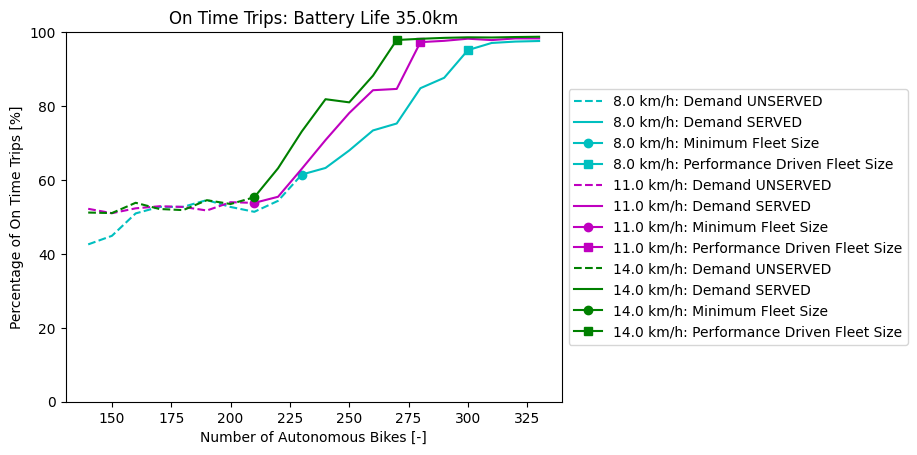

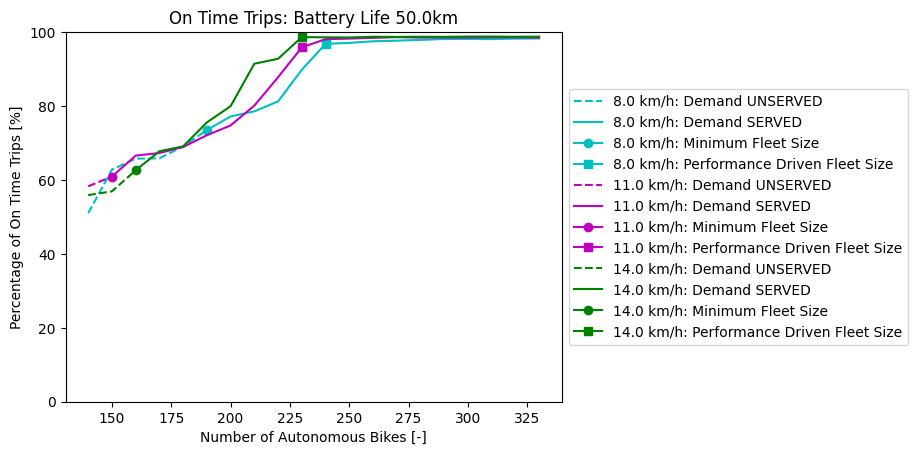

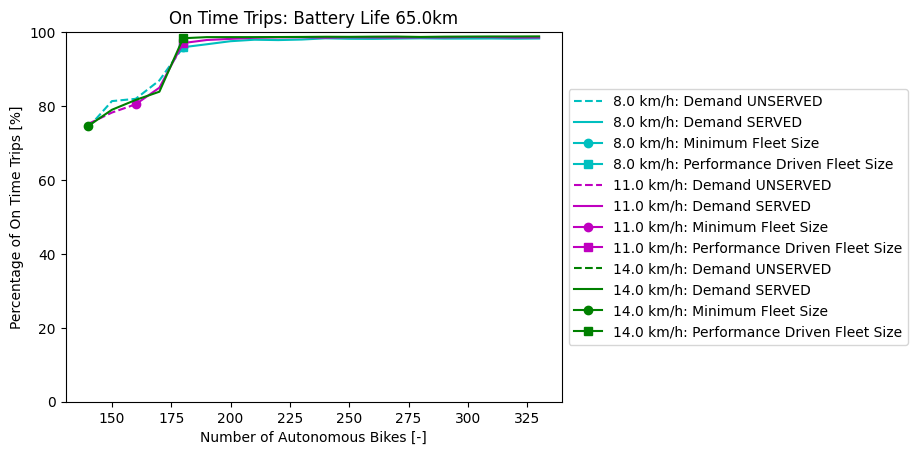

In [19]:
m_cont_s = 0
m_cont = 0
for i in range (l_n_batterylife_possible):
  plt.figure()
  lt_aux_df = lt_df[i] 
  l_lt_aux_df = len(lt_aux_df)   

  for j in range(l_n_pickupspeed_possible):

    boolvalue = 0

    name_latetrips = "Speed " + str((n_pickupspeed_possible[j]*3.6).round(2))

    for k in range(l_lt_aux_df):
      if lt_aux_df.at[k,name_latetrips]<=5:
        fleet_quality = lt_aux_df.at[k,'Num Autonomous Bikes']
        if i==1 and j==1:
          fleet_quality_value = fleet_quality
        boolvalue = 1
        break

    
    if boolvalue == 1:
      print('Minimum fleet to serve 95% of the trips ON TIME:', fleet_quality, ' autonomous bike with ', str(n_batterylife_possible[i]/1000) , "km battery life and ", name_latetrips, 'km/h')
      minimum_fleet_df.at[m_cont,'Battery Life'] = n_batterylife_possible[i]
      minimum_fleet_df.at[m_cont,'Speed'] = (n_pickupspeed_possible[j]*3.6).round(2)
      minimum_fleet_df.at[m_cont,'Num Autonomous Bikes'] = fleet_quality
      minimum_fleet_df.at[m_cont,'Average Distance Traveled [km]'] = 0
      m_cont = m_cont + 1

    for k in range(l_lt_aux_df):
      if lt_aux_df.at[k,'Num Autonomous Bikes']== minimum_fleet_service_df.at[m_cont_s,'Num Autonomous Bikes']:
        x_value = lt_aux_df.at[k,'Num Autonomous Bikes']
        y_value = lt_aux_df.at[k,name_latetrips]
        pos = k
        unserved_df = lt_aux_df[:pos+1]
        served_df = lt_aux_df[pos:]
      if lt_aux_df.at[k,'Num Autonomous Bikes'] == minimum_fleet_df.at[m_cont_s,'Num Autonomous Bikes']:
          x_value_2 = lt_aux_df.at[k,'Num Autonomous Bikes']
          y_value_2 = lt_aux_df.at[k,name_latetrips]
          m_cont_s = m_cont_s + 1
          break

    if j==0:
      color = 'c'
    elif j==1:
      color = 'm'
    else:
      color = 'g'

    plt.plot(unserved_df['Num Autonomous Bikes'],100-unserved_df[name_latetrips],'--',color=color,label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Demand UNSERVED")
    plt.plot(served_df['Num Autonomous Bikes'],100-served_df[name_latetrips],'-',color=color,label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Demand SERVED")
    plt.plot(x_value,100-y_value,color,marker='o',label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Minimum Fleet Size")
    plt.plot(x_value_2,100-y_value_2,color,marker='s',label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Performance Driven Fleet Size")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
    title_aux = "On Time Trips: Battery Life " + str(n_batterylife_possible[i]/1000) + "km" 
    plt.title(title_aux)
    plt.xlabel('Number of Autonomous Bikes [-]') 
    plt.ylim([0, 100]) 
    plt.ylabel('Percentage of On Time Trips [%]') 

#### Average Wait Time


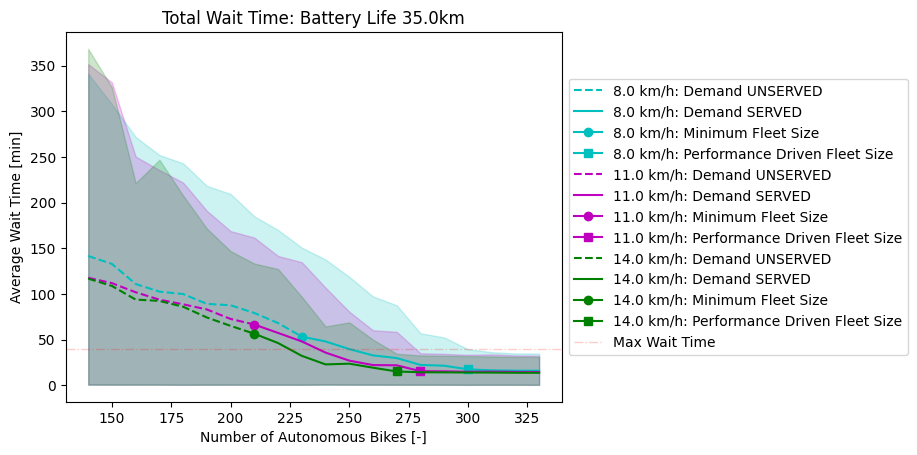

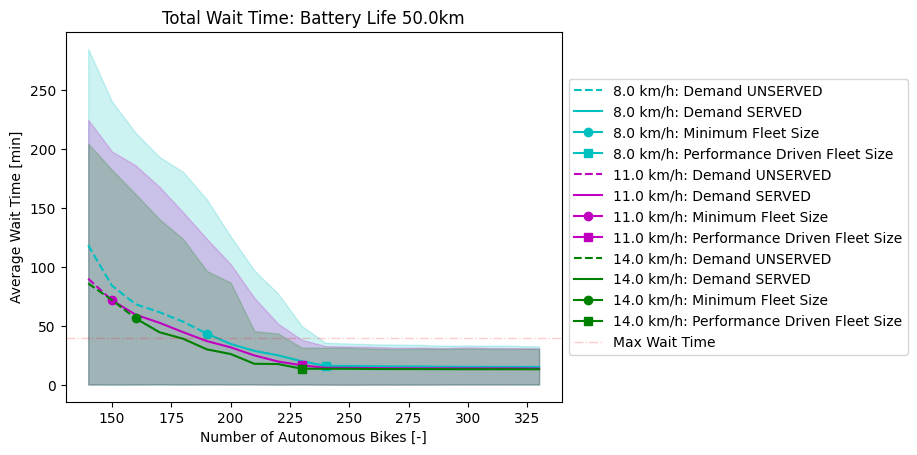

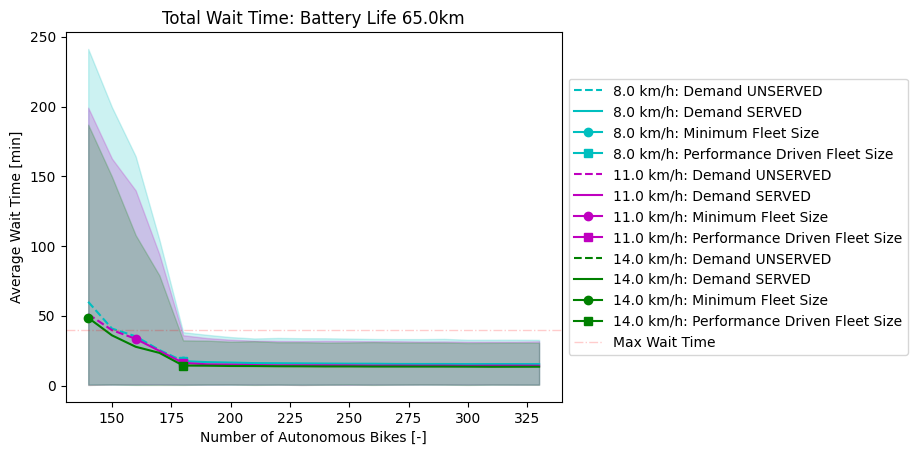

In [24]:
m_cont_s = 0
for i in range (l_n_batterylife_possible):
  plt.figure()
  awt_aux_df = awt_df[i]
  for j in range(l_n_pickupspeed_possible):

    name_waittime = "Speed " + str((n_pickupspeed_possible[j]*3.6).round(2)) 
    name_0pwaittime = "0 Percentile Wait Speed " + str((n_pickupspeed_possible[j]*3.6).round(2))
    name_95pwaittime = "95 Percentile Wait Speed " + str((n_pickupspeed_possible[j]*3.6).round(2))

    if j==0:
      color = 'c'
    elif j==1:
      color = 'm'
    else:
      color = 'g'

    for k in range(len(awt_aux_df)):
      if awt_aux_df.at[k,'Num Autonomous Bikes']== minimum_fleet_service_df.at[m_cont_s,'Num Autonomous Bikes']:
        x_value = awt_aux_df.at[k,'Num Autonomous Bikes']
        y_value = awt_aux_df.at[k,name_waittime]
        unserved_df = awt_aux_df[:k+1]
        served_df = awt_aux_df[k:]
      if awt_aux_df.at[k,'Num Autonomous Bikes']== minimum_fleet_df.at[m_cont_s,'Num Autonomous Bikes']:
        x_value_2 = awt_aux_df.at[k,'Num Autonomous Bikes']
        y_value_2 = awt_aux_df.at[k,name_waittime]
        m_cont_s = m_cont_s + 1
        break

    # error = np.array(sd_aux_df[name_waittime].astype(float))
    p0_value = np.array(awt_aux_df[name_0pwaittime].astype(float))
    p95_value = np.array(awt_aux_df[name_95pwaittime].astype(float))
    mean_unserved = np.array(unserved_df[name_waittime].astype(float))
    x_unserved = np.array(unserved_df['Num Autonomous Bikes'].astype(float))
    mean_served = np.array(served_df[name_waittime].astype(float))
    x_served = np.array(served_df['Num Autonomous Bikes'].astype(float))
    mean = np.array(awt_aux_df[name_waittime].astype(float))
    x = np.array(awt_aux_df['Num Autonomous Bikes'].astype(int))

    # plt.subplots()
    plt.plot(x_unserved, mean_unserved, '--', color=color,label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Demand UNSERVED")
    plt.plot(x_served, mean_served, '-', color=color, label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Demand SERVED")
    plt.fill_between(x, p0_value, p95_value, color=color, alpha=0.2)
    plt.plot(x_value,y_value,color,marker='o',label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Minimum Fleet Size")
    plt.plot(x_value_2,y_value_2,color,marker='s',label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Performance Driven Fleet Size")
    if j == 2:
      plt.axhline(y = 40, linestyle='-.', color='r', alpha = 0.2, linewidth = 1, label='Max Wait Time')
    # plt.ylim([0, 410])  
    title_aux = "Total Wait Time: Battery Life " + str(n_batterylife_possible[i]/1000) + "km" 
    plt.title(title_aux)
    plt.xlabel('Number of Autonomous Bikes [-]') 
    plt.ylabel('Average Wait Time [min]') 
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

In [21]:
# results_path=Path('/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/AutonomousScenario/2022-09-01 17.45.00/autonomousBike_quality_service.csv')
# quality_of_service_df.to_csv(results_path,index=False)

#### Average Pick-Up Wait Time

In [ ]:
m_cont_s = 0
for i in range (l_n_batterylife_possible):
  plt.figure()
  apuwt_aux_df = apuwt_df[i]
  for j in range(l_n_pickupspeed_possible):

    name_pickupwaittime = "Speed " + str((n_pickupspeed_possible[j]*3.6).round(2)) 

    if j==0:
      color = 'c'
    elif j==1:
      color = 'm'
    else:
      color = 'g'
    
    for k in range(len(apuwt_aux_df)):
      if apuwt_aux_df.at[k,'Num Autonomous Bikes']== minimum_fleet_service_df.at[m_cont_s,'Num Autonomous Bikes']:
        x_value = apuwt_aux_df.at[k,'Num Autonomous Bikes']
        y_value = apuwt_aux_df.at[k,name_pickupwaittime]
        unserved_df = apuwt_aux_df[:k+1]
        served_df = apuwt_aux_df[k:]
      if apuwt_aux_df.at[k,'Num Autonomous Bikes']== minimum_fleet_df.at[m_cont_s,'Num Autonomous Bikes']:
        x_value_2 = apuwt_aux_df.at[k,'Num Autonomous Bikes']
        y_value_2 = apuwt_aux_df.at[k,name_pickupwaittime]
        m_cont_s = m_cont_s + 1
        break

    print('Average pick-up wait time:', y_value_2, ' min with ', str(n_batterylife_possible[i]/1000) , "km battery life and ", name_pickupwaittime, 'km/h')

    mean_unserved = np.array(unserved_df[name_pickupwaittime].astype(float))
    x_unserved = np.array(unserved_df['Num Autonomous Bikes'].astype(float))
    mean_served = np.array(served_df[name_pickupwaittime].astype(float))
    x_served = np.array(served_df['Num Autonomous Bikes'].astype(float))
    mean = np.array(apuwt_aux_df[name_pickupwaittime].astype(float))
    x = np.array(apuwt_aux_df['Num Autonomous Bikes'].astype(int))

    # plt.subplots()
    plt.plot(x_unserved, mean_unserved, '--', color=color,label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Demand UNSERVED")
    plt.plot(x_served, mean_served, '-', color=color, label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Demand SERVED")
    # plt.fill_between(x, mean - error, mean + error, color=color, alpha=0.2)
    plt.plot(x_value,y_value,color,marker='o',label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Minimum Fleet Size")
    plt.plot(x_value_2,y_value_2,color,marker='s',label=str((n_pickupspeed_possible[j]*3.6).round(2)) + " km/h: Performance Driven Fleet Size")
    plt.axhline(y = 40, linestyle='-.', color='r', alpha = 0.2, linewidth = 1)
    plt.ylim([0, 410])  
    title_aux = "Pick-Up Wait Time: Battery Life " + str(n_batterylife_possible[i]/1000) + "km" 
    plt.title(title_aux)
    plt.xlabel('Number of Autonomous Bikes [-]') 
    plt.ylabel('Average Wait Time [min]') 
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

#### Median Wait Time

In [ ]:
for i in range (l_n_batterylife_possible):
  plt.figure()
  mwt_aux_df = mwt_df[i]  
  for j in range(l_n_pickupspeed_possible):

    name_mwt = "PickUp & Riding Speed " + str((n_pickupspeed_possible[j]*3.6).round(2))

    line,=plt.plot(mwt_aux_df['Num Autonomous Bikes'],mwt_aux_df[name_mwt])
    line.set_label(name_mwt + " km/h")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
    
  title_aux = "Median Wait Time: Battery Life " + str(n_batterylife_possible[i]/1000) + "km" 
  plt.title(title_aux)
  plt.xlabel('Number of Autonomous Bikes [-]') 
  plt.ylabel('Median Wait Time [min]') 

KeyError: ignored

<Figure size 432x288 with 0 Axes>

#### Performance Parameters

In [ ]:
# Filter autonomous bike trips in the nominal scenario
for i in range(len(minimum_fleet_df)):
  speed = (minimum_fleet_df.at[i,'Speed']/3.6).round(6)
  battery = minimum_fleet_df.at[i,'Battery Life']
  num_autonomousBikes = minimum_fleet_df.at[i,'Num Autonomous Bikes']

  ab_nominal_scenario_df = autonomousBike_trips_df[autonomousBike_trips_df['Num Autonomous Bikes']==num_autonomousBikes]
  ab_nominal_scenario_df = ab_nominal_scenario_df[ab_nominal_scenario_df['AB PickUp Speed']==speed]
  ab_nominal_scenario_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Autonomous Bikes Battery Life']==battery].reset_index().drop('index',axis=1)
  package_nominal_scenario_df = package_trips_df[package_trips_df['Num Autonomous Bikes']==num_autonomousBikes]
  package_nominal_scenario_df = package_nominal_scenario_df[package_nominal_scenario_df['AB PickUp Speed']==speed]
  package_nominal_scenario_df = package_nominal_scenario_df[package_nominal_scenario_df['Autonomous Bikes Battery Life']==battery].reset_index().drop('index',axis=1)

  # Total package demand
  total_p_demand = len(demand_df)

  # Served package demand
  p_demand = len(package_nominal_scenario_df)

  # Average total wait time
  avg_twaittime = package_nominal_scenario_df['Total Time (min)'].sum()/p_demand

  # Average pick-up wait time - Since package is initialized until autonomous bike arrives
  avg_puwaittime = package_nominal_scenario_df['Wait Time (min)'].sum()/p_demand

  # Average delivery wait time 
  avg_dwaittime = package_nominal_scenario_df['Duration (min)'].sum()/p_demand

  # Percentage of trips ON TIME
  ontime = 0
  for j in range (p_demand):
    if package_nominal_scenario_df.at[j,'Total Time (min)'] <= 40:
      ontime = ontime + 1

  # Total km traveled by the autonomous bike fleet
  total_km = ab_nominal_scenario_df['Distance Traveled'].sum()/1000

  # Total minutes traveled by the autonomous bike fleet
  total_min = num_autonomousBikes*24*60

  # Average number of km traveled per autonomous bike
  km_ab=total_km/num_autonomousBikes

  # Pick-Up Parameters 
  ab_pickup_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event']=='END: picking_up_packages'].reset_index().drop('index',axis=1)
  pickup_trips = ab_pickup_df.shape[0]
  pickup_distance = ab_pickup_df['Distance Traveled'].sum()/1000
  pickup_time = ab_pickup_df['Duration (min)'].sum()
  pukm_ab = pickup_distance/num_autonomousBikes
  pumin_ab = pickup_time/num_autonomousBikes
  l_pu_ab = len(ab_pickup_df)

  # Delivery Parameters
  ab_delivery_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event']=='END: in_use_packages'].reset_index().drop('index',axis=1)
  delivery_trips = ab_delivery_df.shape[0]
  delivery_distance = ab_delivery_df['Distance Traveled'].sum()/1000
  delivery_time = ab_delivery_df['Duration (min)'].sum()
  dkm_ab = delivery_distance/num_autonomousBikes
  dmin_ab = delivery_time/num_autonomousBikes
  l_d_ab = len(ab_delivery_df)

  # Go to Recharge Parameters
  ab_goto_recharge_list = ['END: night_recharging','END: low_battery']
  ab_goto_recharge_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event'].isin(ab_goto_recharge_list)].reset_index().drop('index',axis=1)
  gotorecharge_trips = ab_goto_recharge_df.shape[0]
  gotorecharge_distance = ab_goto_recharge_df['Distance Traveled'].sum()/1000
  gotorecharge_time = ab_goto_recharge_df['Duration (min)'].sum()
  gtrkm_ab = gotorecharge_distance/num_autonomousBikes
  gtrmin_ab = gotorecharge_time/num_autonomousBikes
  l_gtr_ab = len(ab_goto_recharge_df)

  # Recharge Parameters
  ab_recharge_list = ['END: getting_night_charge','END: getting_charge']
  ab_recharge_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event'].isin(ab_recharge_list)].reset_index().drop('index',axis=1)
  recharge_time = ab_recharge_df['Duration (min)'].sum()
  rmin_ab = recharge_time/num_autonomousBikes

  # Relocate Parameters
  ab_relocate_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event']=='END: night_relocating'].reset_index().drop('index',axis=1)
  relocate_distance = ab_relocate_df['Distance Traveled'].sum()/1000
  relocate_time = ab_relocate_df['Duration (min)'].sum()
  rlkm_ab = relocate_distance/num_autonomousBikes
  rlmin_ab = relocate_time/num_autonomousBikes
  l_rl_ab = len(ab_relocate_df)

  # Wandering (stopped) Parameters
  ab_wandering_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event']=='END: wandering'].reset_index().drop('index',axis=1)
  wandering_time = ab_wandering_df['Duration (min)'].sum()
  rest_time = total_min - pickup_time - delivery_time - gotorecharge_time - recharge_time - relocate_time - wandering_time
  wandering_time = wandering_time + rest_time
  wmin_ab = wandering_time/num_autonomousBikes

  # Average minutes traveled per car
  min_ab=(total_min-wandering_time)/num_autonomousBikes

  # Parameter Display DataFrame

  # Initialize Parameter DataFrame
  ab_nominal_scenario_events_df = pd.DataFrame(columns=['Parameters','Values','Unit'])

  # Initialize cont variable
  cont = 0

  # Number of Autonomous Bikes
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Autonomous Bikes'
  ab_nominal_scenario_events_df.at[cont,'Values'] = num_autonomousBikes
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
  cont = cont + 1

  # Total Package Demand
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Total Food Delivery Packages'
  ab_nominal_scenario_events_df.at[cont,'Values'] = total_p_demand
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
  cont = cont + 1

  # Served Package Demand
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Served Food Delivery Packages'
  ab_nominal_scenario_events_df.at[cont,'Values'] = p_demand
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
  cont = cont + 1

  # Average Total Wait Time (Package)
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average Total Wait Time'
  ab_nominal_scenario_events_df.at[cont,'Values'] = avg_twaittime
  ab_nominal_scenario_events_df.at[cont,'Unit'] = 'min'
  cont = cont + 1

  # Average Pick-Up Wait Time (Package)
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (avg_puwaittime/avg_twaittime*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1

  # Average Delivery Wait Time (Package)
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (avg_dwaittime/avg_twaittime*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1

  # Percentage of Package Trips On Time
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Package trips < 40 min'
  ab_nominal_scenario_events_df.at[cont,'Values'] = ontime/p_demand*100
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1

  # Percentage of Late Package Trips
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Package trips > 40 min'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (1-ontime/p_demand)*100
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1

  # Average Trips per Autonomous Bike per Day
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average of Trips per Autonomous Bicycle per Day'
  ab_nominal_scenario_events_df.at[cont,'Values'] = p_demand/num_autonomousBikes
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
  cont = cont + 1

  # Total Recharging Trips per Day
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total Recharging Trips per Day'
  ab_nominal_scenario_events_df.at[cont,'Values'] = l_gtr_ab
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
  cont = cont + 1

  # Total Distance

  # Total km traveled by the autonomous bike fleet
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total km'
  ab_nominal_scenario_events_df.at[cont,'Values'] = total_km.round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = 'km'
  cont = cont + 1
  # Percentage of total pick-up km
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (pickup_distance/total_km*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total delivery km
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (delivery_distance/total_km*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total go to recharge km
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Go to Recharge'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (gotorecharge_distance/total_km*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total relocate km
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Relocate'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (relocate_distance/total_km*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Total average km traveled by one autonomous bike
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average total km traveled per autonomous bike'
  ab_nominal_scenario_events_df.at[cont,'Values'] = km_ab.round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = 'km/autonomous bike'
  cont = cont + 1

  # Total Minutes

  # Total minutes traveled by the autonomous bike fleet
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total minutes'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (total_min/num_autonomousBikes/60)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = 'h'
  cont = cont + 1
  # Percentage of total stopped minutes
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Unused / Stopped'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (wandering_time/total_min*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total in use minutes
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'In Use'
  ab_nominal_scenario_events_df.at[cont,'Values'] = 100-(wandering_time/total_min*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total pick-up minutes
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (pickup_time/total_min*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total delivery minutes
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (delivery_time/total_min*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total go to recharge minutes
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Go to Recharge'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (gotorecharge_time/total_min*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total refill minutes
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Recharge'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (recharge_time/total_min*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Percentage of total relocate minutes
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Relocate'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (relocate_time/total_min*100).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
  cont = cont + 1
  # Total average minutes traveled by one autonomous bike
  ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average total hours in use per autonomous bike'
  ab_nominal_scenario_events_df.at[cont,'Values'] = (min_ab/60).round(2)
  ab_nominal_scenario_events_df.at[cont,'Unit'] = 'h/autonomous bike'
  cont = cont + 1

  print('Battery Life ',battery,'Speed ',(speed*3.6).round())
  display(ab_nominal_scenario_events_df)

Battery Life  35000.0 Speed  8.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,310,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,15.899131,min
4,Pick-Up,31.46,%
5,Delivery,68.54,%
6,Package trips < 40 min,97.768864,%
7,Package trips > 40 min,2.231136,%
8,Average of Trips per Autonomous Bicycle per Day,12.867742,-
9,Total Recharging Trips per Day,317,-


Battery Life  35000.0 Speed  11.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,280,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,14.936851,min
4,Pick-Up,27.05,%
5,Delivery,72.95,%
6,Package trips < 40 min,98.094761,%
7,Package trips > 40 min,1.905239,%
8,Average of Trips per Autonomous Bicycle per Day,14.246429,-
9,Total Recharging Trips per Day,351,-


Battery Life  35000.0 Speed  14.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,240,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,15.927969,min
4,Pick-Up,59.31,%
5,Delivery,40.69,%
6,Package trips < 40 min,97.718726,%
7,Package trips > 40 min,2.281274,%
8,Average of Trips per Autonomous Bicycle per Day,16.620833,-
9,Total Recharging Trips per Day,449,-


Battery Life  50000.0 Speed  8.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,250,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,16.393457,min
4,Pick-Up,33.53,%
5,Delivery,66.47,%
6,Package trips < 40 min,97.39283,%
7,Package trips > 40 min,2.60717,%
8,Average of Trips per Autonomous Bicycle per Day,15.956,-
9,Total Recharging Trips per Day,261,-


Battery Life  50000.0 Speed  11.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,230,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,12.092404,min
4,Pick-Up,33.12,%
5,Delivery,66.88,%
6,Package trips < 40 min,99.724242,%
7,Package trips > 40 min,0.275758,%
8,Average of Trips per Autonomous Bicycle per Day,17.343478,-
9,Total Recharging Trips per Day,239,-


Battery Life  50000.0 Speed  14.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,190,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,9.672524,min
4,Pick-Up,32.99,%
5,Delivery,67.01,%
6,Package trips < 40 min,100.0,%
7,Package trips > 40 min,0.0,%
8,Average of Trips per Autonomous Bicycle per Day,20.994737,-
9,Total Recharging Trips per Day,244,-


Battery Life  65000.0 Speed  8.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,210,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,16.984424,min
4,Pick-Up,35.84,%
5,Delivery,64.16,%
6,Package trips < 40 min,96.139383,%
7,Package trips > 40 min,3.860617,%
8,Average of Trips per Autonomous Bicycle per Day,18.995238,-
9,Total Recharging Trips per Day,202,-


Battery Life  65000.0 Speed  11.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,190,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,12.342609,min
4,Pick-Up,34.48,%
5,Delivery,65.52,%
6,Package trips < 40 min,99.649035,%
7,Package trips > 40 min,0.350965,%
8,Average of Trips per Autonomous Bicycle per Day,20.994737,-
9,Total Recharging Trips per Day,198,-


Battery Life  65000.0 Speed  14.0


,Parameters,Values,Unit
0,Number of Autonomous Bikes,170,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,15.19924,min
4,Pick-Up,57.36,%
5,Delivery,42.64,%
6,Package trips < 40 min,97.267486,%
7,Package trips > 40 min,2.732514,%
8,Average of Trips per Autonomous Bicycle per Day,23.464706,-
9,Total Recharging Trips per Day,242,-


## Autonomous Bikes Nominal Scenario


### Average Parameters

#### Parameter Calculation

In [ ]:
# Filter autonomous bike trips in the nominal scenario
speeds = package_trips_df['AB PickUp Speed'].unique()
nominal_speed = speeds[1]
# fleet_quality_value = 230

ab_nominal_scenario_df = autonomousBike_trips_df[autonomousBike_trips_df['Num Autonomous Bikes']==fleet_quality_value]
ab_nominal_scenario_df = ab_nominal_scenario_df[ab_nominal_scenario_df['AB PickUp Speed']==nominal_speed]
ab_nominal_scenario_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Autonomous Bikes Battery Life']==50000].reset_index().drop('index',axis=1)
package_nominal_scenario_df = package_trips_df[package_trips_df['Num Autonomous Bikes']==fleet_quality_value]
package_nominal_scenario_df = package_nominal_scenario_df[package_nominal_scenario_df['AB PickUp Speed']==nominal_speed]
package_nominal_scenario_df = package_nominal_scenario_df[package_nominal_scenario_df['Autonomous Bikes Battery Life']==50000].reset_index().drop('index',axis=1)

# Total package demand
total_p_demand = len(demand_df)

# Served package demand
p_demand = len(package_nominal_scenario_df)

# Average total wait time
avg_twaittime = package_nominal_scenario_df['Total Time (min)'].sum()/p_demand

# Average pick-up wait time - Since package is initialized until autonomous bike arrives
avg_puwaittime = package_nominal_scenario_df['Wait Time (min)'].sum()/p_demand

# Average delivery wait time 
avg_dwaittime = package_nominal_scenario_df['Duration (min)'].sum()/p_demand

# Percentage of trips ON TIME
ontime = 0
for i in range (p_demand):
  if package_nominal_scenario_df.at[i,'Total Time (min)'] <= 40:
    ontime = ontime + 1

# Total km traveled by the autonomous bike fleet
total_km = ab_nominal_scenario_df['Distance Traveled'].sum()/1000

# Total minutes traveled by the autonomous bike fleet
total_min = fleet_quality_value*24*60

# Average number of km traveled per autonomous bike
km_ab=total_km/fleet_quality_value

# Pick-Up Parameters 
ab_pickup_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event']=='END: picking_up_packages'].reset_index().drop('index',axis=1)
pickup_trips = ab_pickup_df.shape[0]
pickup_distance = ab_pickup_df['Distance Traveled'].sum()/1000
pickup_time = ab_pickup_df['Duration (min)'].sum()
pukm_ab = pickup_distance/fleet_quality_value
pumin_ab = pickup_time/fleet_quality_value
l_pu_ab = len(ab_pickup_df)

# Delivery Parameters
ab_delivery_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event']=='END: in_use_packages'].reset_index().drop('index',axis=1)
delivery_trips = ab_delivery_df.shape[0]
delivery_distance = ab_delivery_df['Distance Traveled'].sum()/1000
delivery_time = ab_delivery_df['Duration (min)'].sum()
dkm_ab = delivery_distance/fleet_quality_value
dmin_ab = delivery_time/fleet_quality_value
l_d_ab = len(ab_delivery_df)

# Go to Recharge Parameters
ab_goto_recharge_list = ['END: night_recharging','END: low_battery']
ab_goto_recharge_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event'].isin(ab_goto_recharge_list)].reset_index().drop('index',axis=1)
gotorecharge_trips = ab_goto_recharge_df.shape[0]
gotorecharge_distance = ab_goto_recharge_df['Distance Traveled'].sum()/1000
gotorecharge_time = ab_goto_recharge_df['Duration (min)'].sum()
gtrkm_ab = gotorecharge_distance/fleet_quality_value
gtrmin_ab = gotorecharge_time/fleet_quality_value
l_gtr_ab = len(ab_goto_recharge_df)

# Recharge Parameters
ab_recharge_list = ['END: getting_night_charge','END: getting_charge']
ab_recharge_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event'].isin(ab_recharge_list)].reset_index().drop('index',axis=1)
recharge_time = ab_recharge_df['Duration (min)'].sum()
rmin_ab = recharge_time/fleet_quality_value

# Relocate Parameters
ab_relocate_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event']=='END: night_relocating'].reset_index().drop('index',axis=1)
relocate_distance = ab_relocate_df['Distance Traveled'].sum()/1000
relocate_time = ab_relocate_df['Duration (min)'].sum()
rlkm_ab = relocate_distance/fleet_quality_value
rlmin_ab = relocate_time/fleet_quality_value
l_rl_ab = len(ab_relocate_df)

# Wandering (stopped) Parameters
ab_wandering_df = ab_nominal_scenario_df[ab_nominal_scenario_df['Event']=='END: wandering'].reset_index().drop('index',axis=1)
wandering_time = ab_wandering_df['Duration (min)'].sum()
rest_time = total_min - pickup_time - delivery_time - gotorecharge_time - recharge_time - relocate_time - wandering_time
wandering_time = wandering_time + rest_time
wmin_ab = wandering_time/fleet_quality_value

# Average minutes traveled per car
min_ab=(total_min-wandering_time)/fleet_quality_value

In [ ]:
# Parameter Display DataFrame

# Initialize Parameter DataFrame
ab_nominal_scenario_events_df = pd.DataFrame(columns=['Parameters','Values','Unit'])

# Initialize cont variable
cont = 0

# Number of Autonomous Bikes
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Autonomous Bikes'
ab_nominal_scenario_events_df.at[cont,'Values'] = fleet_quality_value
ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Package Demand
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Total Food Delivery Packages'
ab_nominal_scenario_events_df.at[cont,'Values'] = total_p_demand
ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Served Package Demand
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Number of Served Food Delivery Packages'
ab_nominal_scenario_events_df.at[cont,'Values'] = p_demand
ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Average Total Wait Time (Package)
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average Total Wait Time'
ab_nominal_scenario_events_df.at[cont,'Values'] = avg_twaittime
ab_nominal_scenario_events_df.at[cont,'Unit'] = 'min'
cont = cont + 1

# Average Pick-Up Wait Time (Package)
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
ab_nominal_scenario_events_df.at[cont,'Values'] = (avg_puwaittime/avg_twaittime*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Average Delivery Wait Time (Package)
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
ab_nominal_scenario_events_df.at[cont,'Values'] = (avg_dwaittime/avg_twaittime*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Percentage of Package Trips On Time
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Package trips < 40 min'
ab_nominal_scenario_events_df.at[cont,'Values'] = ontime/p_demand*100
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Percentage of Late Package Trips
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Package trips > 40 min'
ab_nominal_scenario_events_df.at[cont,'Values'] = (1-ontime/p_demand)*100
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1

# Average Trips per Autonomous Bike per Day
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average of Trips per Autonomous Bicycle per Day'
ab_nominal_scenario_events_df.at[cont,'Values'] = p_demand/fleet_quality_value
ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Recharging Trips per Day
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total Recharging Trips per Day'
ab_nominal_scenario_events_df.at[cont,'Values'] = l_gtr_ab
ab_nominal_scenario_events_df.at[cont,'Unit'] = '-'
cont = cont + 1

# Total Distance

# Total km traveled by the autonomous bike fleet
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total km'
ab_nominal_scenario_events_df.at[cont,'Values'] = total_km.round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = 'km'
cont = cont + 1
# Percentage of total pick-up km
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
ab_nominal_scenario_events_df.at[cont,'Values'] = (pickup_distance/total_km*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total delivery km
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
ab_nominal_scenario_events_df.at[cont,'Values'] = (delivery_distance/total_km*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total go to recharge km
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Go to Recharge'
ab_nominal_scenario_events_df.at[cont,'Values'] = (gotorecharge_distance/total_km*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total relocate km
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Relocate'
ab_nominal_scenario_events_df.at[cont,'Values'] = (relocate_distance/total_km*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Total average km traveled by one autonomous bike
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average total km traveled per autonomous bike'
ab_nominal_scenario_events_df.at[cont,'Values'] = km_ab.round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = 'km/autonomous bike'
cont = cont + 1

# Total Minutes

# Total minutes traveled by the autonomous bike fleet
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Total minutes'
ab_nominal_scenario_events_df.at[cont,'Values'] = (total_min/fleet_quality_value/60)
ab_nominal_scenario_events_df.at[cont,'Unit'] = 'h'
cont = cont + 1
# Percentage of total stopped minutes
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Unused / Stopped'
ab_nominal_scenario_events_df.at[cont,'Values'] = (wandering_time/total_min*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total in use minutes
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'In Use'
ab_nominal_scenario_events_df.at[cont,'Values'] = 100-(wandering_time/total_min*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total pick-up minutes
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Pick-Up'
ab_nominal_scenario_events_df.at[cont,'Values'] = (pickup_time/total_min*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total delivery minutes
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Delivery'
ab_nominal_scenario_events_df.at[cont,'Values'] = (delivery_time/total_min*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total go to recharge minutes
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Go to Recharge'
ab_nominal_scenario_events_df.at[cont,'Values'] = (gotorecharge_time/total_min*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total refill minutes
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Recharge'
ab_nominal_scenario_events_df.at[cont,'Values'] = (recharge_time/total_min*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Percentage of total relocate minutes
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Relocate'
ab_nominal_scenario_events_df.at[cont,'Values'] = (relocate_time/total_min*100).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = '%'
cont = cont + 1
# Total average minutes traveled by one autonomous bike
ab_nominal_scenario_events_df.at[cont,'Parameters'] = 'Average total hours in use per autonomous bike'
ab_nominal_scenario_events_df.at[cont,'Values'] = (min_ab/60).round(2)
ab_nominal_scenario_events_df.at[cont,'Unit'] = 'h/autonomous bike'
cont = cont + 1

#### Parameter Display

In [ ]:
ab_nominal_scenario_events_df.style.apply(lambda x: ['background: bisque' if (x.name == 0 or x.name == 1 or x.name == 2 or x.name == 3 or x.name == 6 or x.name == 7 or x.name == 8 or x.name == 9 or x.name == 10 or x.name == 15 or x.name == 16 or x.name == 24) else '' for i in x], axis=1).format(precision=2)

,Parameters,Values,Unit
0,Number of Autonomous Bikes,230,-
1,Number of Total Food Delivery Packages,3989,-
2,Number of Served Food Delivery Packages,3989,-
3,Average Total Wait Time,14.62,min
4,Pick-Up,25.48,%
5,Delivery,74.52,%
6,Package trips < 40 min,98.47,%
7,Package trips > 40 min,1.53,%
8,Average of Trips per Autonomous Bicycle per Day,17.34,-
9,Total Recharging Trips per Day,284,-


### Events in Day


#### Calculation

In [ ]:
# Stopped
stopped = ab_nominal_scenario_df.loc[(ab_nominal_scenario_df['Event'] == 'END: wandering') | (ab_nominal_scenario_df['Event'] == 'START: wandering')]
df = stopped
count = 0

stopped_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    event = row["Event"]
    if event == 'END: wandering':
        count = count-1
    elif event == 'START: wandering':
        count = count+1
    else:
        print('Event type error')
    # stopped_count.loc[i] = [i] + [count]
    stopped_count.at[i,'Count'] = count
    stopped_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Low battery
lowbattery = ab_nominal_scenario_df.loc[(ab_nominal_scenario_df['Event']== 'END: low_battery') | (ab_nominal_scenario_df['Event']== 'START: low_battery') | (ab_nominal_scenario_df['Event']== 'END: night_recharging') | (ab_nominal_scenario_df['Event']== 'START: night_recharging')]
df = lowbattery
count=0

lowbattery_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: low_battery':
        count = count-1
    elif event == 'START: low_battery':
        count = count+1
    elif event == 'END: night_recharging':
        count = count-1
    elif event == 'START: night_recharging':
        count = count+1
    else:
        print('Event type error')
    # lowbattery_count.loc[i] = [i] + [count]
    lowbattery_count.at[i,'Count'] = count
    lowbattery_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Charge
charging = ab_nominal_scenario_df.loc[(ab_nominal_scenario_df['Event'] == 'END: getting_charge') | (ab_nominal_scenario_df['Event'] == 'START: getting_charge') | (ab_nominal_scenario_df['Event'] == 'END: getting_night_charge') | (ab_nominal_scenario_df['Event'] == 'START: getting_night_charge')]
df = charging
count = 0

charging_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: getting_charge':
        count = count-1
    elif event == 'START: getting_charge':
        count = count+1
    elif event == 'END: getting_night_charge':
        count = count-1
    elif event == 'START: getting_night_charge':
        count = count+1
    else:
        print('Event type error')
    charging_count.at[i,'Count'] = count
    charging_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Night Relocating
relocating = ab_nominal_scenario_df.loc[(ab_nominal_scenario_df['Event'] == 'END: night_relocating') | (ab_nominal_scenario_df['Event'] == 'START: night_relocating')]
df = relocating
count = 0

relocating_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: night_relocating':
        count = count-1
    elif event == 'START: night_relocating':
        count = count+1
    else:
        print('Event type error')
    # relocating_count.loc[i] = [i] + [count]
    relocating_count.at[i,'Count'] = count
    relocating_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Pick-Up
pickup = ab_nominal_scenario_df.loc[(ab_nominal_scenario_df['Event'] == 'END: picking_up_packages') | (ab_nominal_scenario_df['Event'] == 'START: picking_up_packages')]
df = pickup
count = 0

pickup_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count = count-1
    elif event == 'START: picking_up_packages':
        count = count+1
    else:
        print('Event type error')
    # pickup_count.loc[i] = [i] + [count]
    pickup_count.at[i,'Count'] =  count
    pickup_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# In Use

inuse = ab_nominal_scenario_df.loc[(ab_nominal_scenario_df['Event']== 'END: in_use_packages') | (ab_nominal_scenario_df['Event']== 'START: in_use_packages')] 
df = inuse
count = 0

inuse_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: in_use_packages':
        count = count-1
    elif event == 'START: in_use_packages':
        count = count+1
    else:
        print('Event type error')
    # inuse_count.loc[i] = [i] + [count]
    inuse_count.at[i,'Count'] = count
    inuse_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

# Pick-Up & In Use 

pickup_inuse = ab_nominal_scenario_df.loc[(ab_nominal_scenario_df['Event'] == 'END: picking_up_packages') | (ab_nominal_scenario_df['Event'] == 'START: picking_up_packages') | (ab_nominal_scenario_df['Event']== 'END: in_use_packages') | (ab_nominal_scenario_df['Event']== 'START: in_use_packages')] 
df = pickup_inuse
count = 0

pickup_inuse_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count = count-1
    elif event == 'START: picking_up_packages':
        count = count+1
    elif event == 'END: in_use_packages':
        count = count-1
    elif event == 'START: in_use_packages':
        count = count+1
    else:
        print('Event type error')
    # pickup_inuse_count.loc[i] = [i] + [count]
    pickup_inuse_count.at[i,'Count'] = count
    pickup_inuse_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

#### Display

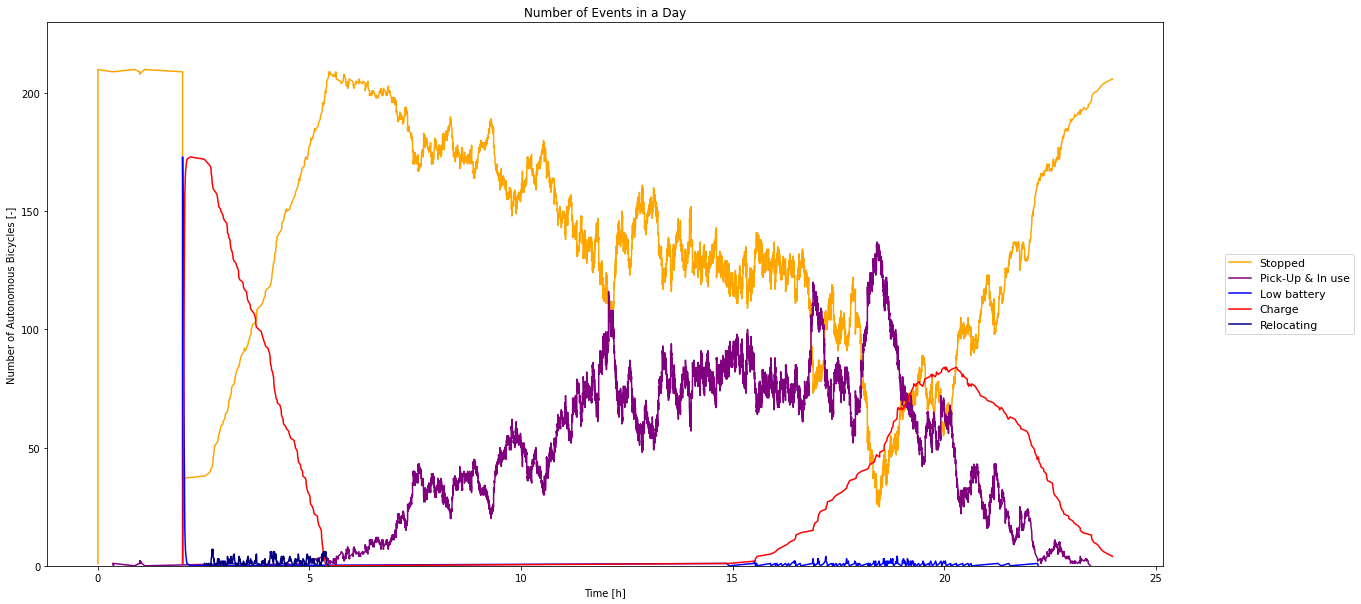

In [ ]:
#Plot
plt.figure(figsize=(20,10))
plt.plot( 'Time', 'Count', data = stopped_count,   color='orange', label="Stopped")
# plt.plot( 'Time', 'Count', data = inuse_count, color='olive', label="In use")
# plt.plot( 'Time', 'Count', data = pickup_count,   color='green', label="Pick-Up")
plt.plot( 'Time', 'Count', data = pickup_inuse_count,   color='purple', label="Pick-Up & In use")
plt.plot( 'Time', 'Count', data = lowbattery_count,   color='blue', label="Low battery")
plt.plot( 'Time', 'Count', data = charging_count,   color='red', label="Charge")
plt.plot( 'Time', 'Count', data = relocating_count,   color='navy', label="Relocating")
plt.legend( loc='center left', bbox_to_anchor=(1.05, 0.5),fontsize=11)
plt.title('Number of Events in a Day')
plt.xlabel('Time [h]') 
plt.ylabel('Number of Autonomous Bicycles [-]') 
plt.ylim(0,230)
# plt.xticks(x[::2])
plt.show()

### Wait Times in Day

#### Calculation


In [ ]:
l_package_nominal =len(package_nominal_scenario_df)

pickup_waittime = pd.DataFrame(columns=['Time', 'Wait (min)'])
for i in range(l_package_nominal):
  pickup_waittime.at[i,'Time'] = package_nominal_scenario_df.at[i,'Cycle']*2/(60*60)
  pickup_waittime.at[i,'Wait (min)'] = package_nominal_scenario_df.at[i,'Wait Time (min)']

delivery_waittime = pd.DataFrame(columns=['Time', 'Wait (min)'])
for i in range(l_package_nominal):
  delivery_waittime.at[i,'Time'] = package_nominal_scenario_df.at[i,'Cycle']*2/(60*60)
  delivery_waittime.at[i,'Wait (min)'] = package_nominal_scenario_df.at[i,'Duration (min)']

total_waittime = pd.DataFrame(columns=['Time', 'Wait (min)'])
for i in range(l_package_nominal):
  total_waittime.at[i,'Time'] = package_nominal_scenario_df.at[i,'Cycle']*2/(60*60)
  total_waittime.at[i,'Wait (min)'] = package_nominal_scenario_df.at[i,'Total Time (min)']

In [ ]:
pickup_waittime_timeframe = pd.DataFrame(columns=['Time', 'Average Wait (min)', 'Max (min)','Min (min)'])
cont = 0
for i in range(24):
  waits = pickup_waittime.loc[(pickup_waittime['Time']>=i) & (pickup_waittime['Time']<i+0.5)].reset_index().drop('index',axis=1)
  pickup_waittime_timeframe.at[cont,'Time'] = i 
  l_waits = len(waits)
  if l_waits != 0:
    pickup_waittime_timeframe.at[cont,'Average Wait (min)'] = waits['Wait (min)'].sum()/len(waits)
    pickup_waittime_timeframe.at[cont,'Max (min)'] = waits['Wait (min)'].max()
    pickup_waittime_timeframe.at[cont,'Min (min)'] = waits['Wait (min)'].min()
  else:
    pickup_waittime_timeframe.at[cont,'Average Wait (min)'] = 0
    pickup_waittime_timeframe.at[cont,'Max (min)'] = 0
    pickup_waittime_timeframe.at[cont,'Min (min)'] = 0
  cont = cont + 1

  waits = pickup_waittime.loc[(pickup_waittime['Time']>=i+0.5) & (pickup_waittime['Time']<i+1)].reset_index().drop('index',axis=1)
  pickup_waittime_timeframe.at[cont,'Time'] = i + 0.5
  l_waits = len(waits)
  if l_waits != 0:
    pickup_waittime_timeframe.at[cont,'Average Wait (min)'] = waits['Wait (min)'].sum()/len(waits)
    pickup_waittime_timeframe.at[cont,'Max (min)'] = waits['Wait (min)'].max()
    pickup_waittime_timeframe.at[cont,'Min (min)'] = waits['Wait (min)'].min()
  else:
    pickup_waittime_timeframe.at[cont,'Average Wait (min)'] = 0
    pickup_waittime_timeframe.at[cont,'Max (min)'] = 0
    pickup_waittime_timeframe.at[cont,'Min (min)'] = 0
  cont = cont + 1

delivery_waittime_timeframe = pd.DataFrame(columns=['Time', 'Average Wait (min)', 'Max (min)','Min (min)'])
cont = 0
for i in range(24):
  waits = delivery_waittime.loc[(delivery_waittime['Time']>=i) & (delivery_waittime['Time']<i+0.5)].reset_index().drop('index',axis=1)
  delivery_waittime_timeframe.at[cont,'Time'] = i 
  l_waits = len(waits)
  if l_waits != 0:
    delivery_waittime_timeframe.at[cont,'Average Wait (min)'] = waits['Wait (min)'].sum()/len(waits)
    delivery_waittime_timeframe.at[cont,'Max (min)'] = waits['Wait (min)'].max()
    delivery_waittime_timeframe.at[cont,'Min (min)'] = waits['Wait (min)'].min()
  else:
    delivery_waittime_timeframe.at[cont,'Average Wait (min)'] = 0
    delivery_waittime_timeframe.at[cont,'Max (min)'] = 0
    delivery_waittime_timeframe.at[cont,'Min (min)'] = 0
  cont = cont + 1

  waits = delivery_waittime.loc[(delivery_waittime['Time']>=i+0.5) & (delivery_waittime['Time']<i+1)].reset_index().drop('index',axis=1)
  delivery_waittime_timeframe.at[cont,'Time'] = i + 0.5
  l_waits = len(waits)
  if l_waits != 0:
    delivery_waittime_timeframe.at[cont,'Average Wait (min)'] = waits['Wait (min)'].sum()/len(waits)
    delivery_waittime_timeframe.at[cont,'Max (min)'] = waits['Wait (min)'].max()
    delivery_waittime_timeframe.at[cont,'Min (min)'] = waits['Wait (min)'].min()
  else:
    delivery_waittime_timeframe.at[cont,'Average Wait (min)'] = 0
    delivery_waittime_timeframe.at[cont,'Max (min)'] = 0
    delivery_waittime_timeframe.at[cont,'Min (min)'] = 0
  cont = cont + 1

total_waittime_timeframe = pd.DataFrame(columns=['Time', 'Average Wait (min)', 'Max (min)','Min (min)'])
cont = 0
for i in range(24):
  waits = total_waittime.loc[(total_waittime['Time']>=i) & (total_waittime['Time']<i+0.5)].reset_index().drop('index',axis=1)
  total_waittime_timeframe.at[cont,'Time'] = i 
  l_waits = len(waits)
  if l_waits != 0:
    total_waittime_timeframe.at[cont,'Average Wait (min)'] = waits['Wait (min)'].sum()/len(waits)
    total_waittime_timeframe.at[cont,'Max (min)'] = waits['Wait (min)'].max()
    total_waittime_timeframe.at[cont,'Min (min)'] = waits['Wait (min)'].min()
  else:
    total_waittime_timeframe.at[cont,'Average Wait (min)'] = 0
    total_waittime_timeframe.at[cont,'Max (min)'] = 0
    total_waittime_timeframe.at[cont,'Min (min)'] = 0
  cont = cont + 1

  waits = total_waittime.loc[(total_waittime['Time']>=i+0.5) & (total_waittime['Time']<i+1)].reset_index().drop('index',axis=1)
  total_waittime_timeframe.at[cont,'Time'] = i + 0.5
  l_waits = len(waits)
  if l_waits != 0:
    total_waittime_timeframe.at[cont,'Average Wait (min)'] = waits['Wait (min)'].sum()/len(waits)
    total_waittime_timeframe.at[cont,'Max (min)'] = waits['Wait (min)'].max()
    total_waittime_timeframe.at[cont,'Min (min)'] = waits['Wait (min)'].min()
  else:
    total_waittime_timeframe.at[cont,'Average Wait (min)'] = 0
    total_waittime_timeframe.at[cont,'Max (min)'] = 0
    total_waittime_timeframe.at[cont,'Min (min)'] = 0
  cont = cont + 1

#### Display

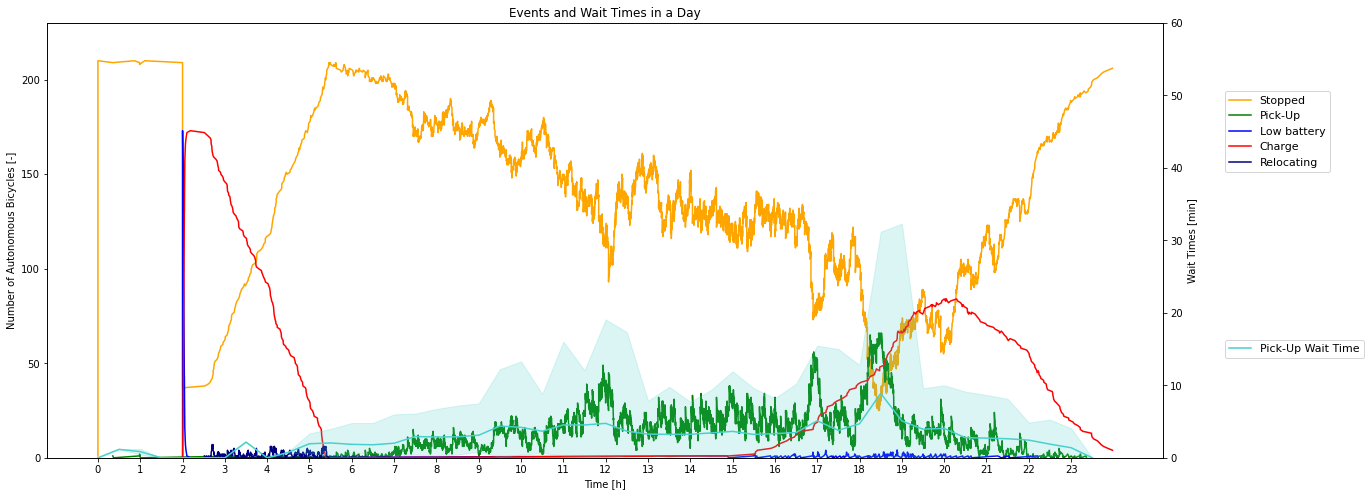

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))

ax.plot( 'Time', 'Count', data = stopped_count, color='orange', label="Stopped")
# ax.plot( 'Time', 'Count', data = inuse_count, color='olive', label="In use")
ax.plot( 'Time', 'Count', data = pickup_count, color='green', label="Pick-Up")
# ax.plot( 'Time', 'Count', data = pickup_inuse_count, color='purple', label="Pick-Up & In use")
ax.plot( 'Time', 'Count', data = lowbattery_count, color='blue', label="Low battery")
ax.plot( 'Time', 'Count', data = charging_count, color='red', label="Charge")
ax.plot( 'Time', 'Count', data = relocating_count, color='navy', label="Relocating")

ax2 = ax.twinx()

max = np.array(pickup_waittime_timeframe['Max (min)'].astype(float))
min = np.array(pickup_waittime_timeframe['Min (min)'].astype(float))
mean = np.array(pickup_waittime_timeframe['Average Wait (min)'].astype(float))
x = np.array(pickup_waittime_timeframe['Time'].astype(float))
  
ax2.plot(x, mean, color='mediumturquoise', label="Pick-Up Wait Time")
ax2.fill_between(x, min, max, color='mediumturquoise',alpha=0.2)

# max = np.array(delivery_waittime_timeframe['Max (min)'].astype(float))
# min = np.array(delivery_waittime_timeframe['Min (min)'].astype(float))
# mean = np.array(delivery_waittime_timeframe['Average Wait (min)'].astype(float))
# x = np.array(delivery_waittime_timeframe['Time'].astype(float))
  
# ax2.plot(x, mean, color='lightcoral', label="Delivery Wait Time")
# ax2.fill_between(x, min, max, color='lightcoral',alpha=0.2)

# max = np.array(total_waittime_timeframe['Max (min)'].astype(float))
# min = np.array(total_waittime_timeframe['Min (min)'].astype(float))
# mean = np.array(total_waittime_timeframe['Average Wait (min)'].astype(float))
# x = np.array(total_waittime_timeframe['Time'].astype(float))
  
# ax2.plot(x, mean, color='royalblue', label="Total Wait Time")
# ax2.fill_between(x, min, max, color='royalblue',alpha=0.2)

plt.title('Events and Wait Times in a Day')
ax.set_xlabel('Time [h]') 
ax.set_ylabel('Number of Autonomous Bicycles [-]') 
ax2.set_ylabel('Wait Times [min]')
ax.legend( loc='center left', bbox_to_anchor=(1.05, 0.75),fontsize=11)
ax2.legend( loc='center left', bbox_to_anchor=(1.05, 0.25),fontsize=11)
ax.set_xticks(x[::2])
ax2.set_xticks(x[::2])
ax.set_ylim(0,230)
ax2.set_ylim(0,60)

plt.show()

### Traveled km per bicycle

#### Calculation


In [ ]:
ab_agents_df = ab_nominal_scenario_df['Agent'].unique()
l_ab_agents = len(ab_agents_df)
distance_df = pd.DataFrame(ab_agents_df)
distance_df = distance_df.rename(columns={0: "Agent"}, errors="raise")
low_percentage = 0
high_percentage = 0
low_travel_df = pd.DataFrame(columns=['Agent','Activity','Message'])
cont = 0
non_use = 0
for i in range(l_ab_agents):
  ab_agent = ab_nominal_scenario_df[ab_nominal_scenario_df['Agent']==ab_agents_df[i]]
  charge_event = ab_agent[(ab_agent['Event']=='END: low_battery') | (ab_agent['Event']=='END: night_recharging')]
  charge_trips = len(charge_event)
  total_distance = ab_agent['Distance Traveled'].sum()/1000
  if total_distance < km_ab:
    low_percentage = low_percentage + 1
    aux = ab_agent.tail(2).reset_index().drop('index',axis=1)
    if aux.at[0,'Message']!='nil':
      aux = aux.dropna().reset_index().drop('index',axis=1)
    if aux.empty:
      non_use = non_use + 1
    else:
      if aux.at[0,'Message']!='nil':
        if aux.at[0,'Event'] == 'END: in_use_packages':
          low_travel_df.at[cont,'Agent'] = aux.at[0,'Agent']
          low_travel_df.at[cont,'Activity'] = 'Delivery'
          low_travel_df.at[cont,'Message'] = aux.at[0,'Message']
          cont = cont + 1
        else:
          low_travel_df.at[cont,'Agent'] = aux.at[0,'Agent']
          low_travel_df.at[cont,'Activity'] = 'Charge'
          low_travel_df.at[cont,'Message'] = aux.at[0,'Message']
          cont = cont + 1
      # else:
      #   low_travel_df.at[cont,'Agent'] = aux.at[1,'Agent']
      #   low_travel_df.at[cont,'Activity'] = 'Charge'
      #   low_travel_df.at[cont,'Message'] = aux.at[1,'Message']
      #   cont = cont + 1
  else:
    high_percentage = high_percentage + 1

  distance_df.at[i,'Total Distance Traveled'] = total_distance
  distance_df.at[i,'Charge Trips'] = charge_trips

prueba = low_percentage+high_percentage
print(prueba)    
distance_df=distance_df.sort_values(by=['Total Distance Traveled']).reset_index().drop('index',axis=1)
distance_df = distance_df.reset_index()
distance_df = distance_df.rename(columns={'index': "Autonomous Bike"}, errors="raise")
low_percentage = (low_percentage/fleet_quality_value*100)
high_percentage = (high_percentage/fleet_quality_value*100)
low_travel_df['Package Number'] = low_travel_df['Message'].str.extract('(\d+)').astype(int)

210


#### Display

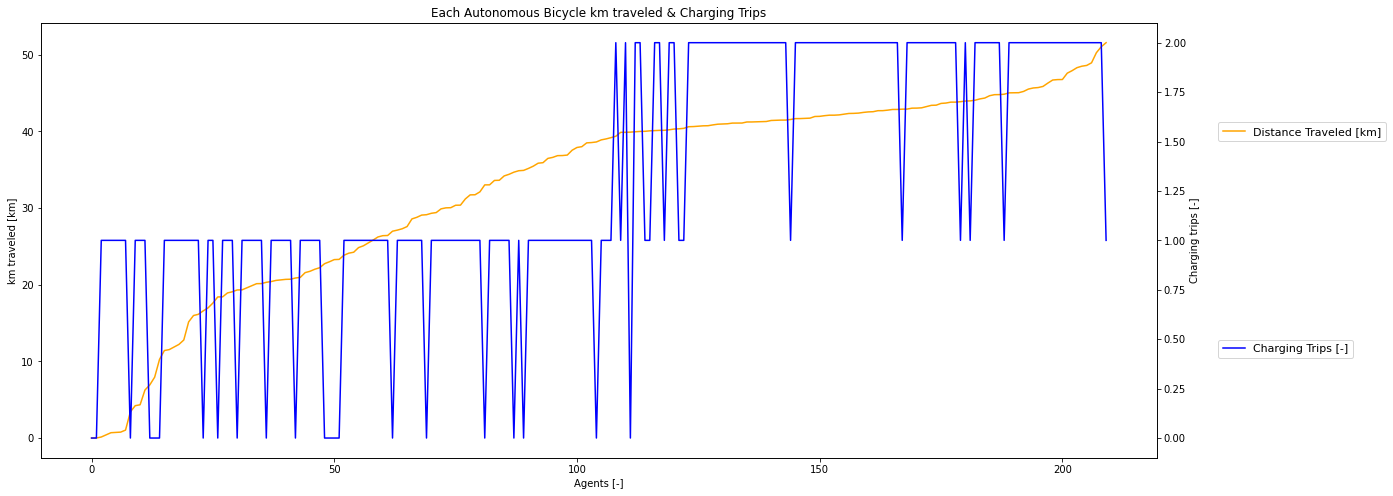

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))

ax.plot('Autonomous Bike','Total Distance Traveled', data = distance_df, color='orange', label="Distance Traveled [km]")

ax2 = ax.twinx()
ax2.plot('Autonomous Bike','Charge Trips', data = distance_df, color='blue', label="Charging Trips [-]")

plt.title('Each Autonomous Bicycle km traveled & Charging Trips')
ax.set_xlabel('Agents [-]') 
ax.set_ylabel('km traveled [km]') 
ax2.set_ylabel('Charging trips [-]')
ax.legend( loc='center left', bbox_to_anchor=(1.05, 0.75),fontsize=11)
ax2.legend( loc='center left', bbox_to_anchor=(1.05, 0.25),fontsize=11)

38.57142857142858 % of the autonomous bicycles travel less than 32.98 km per day
61.42857142857143 % of the autonomous bicycles travel more than 32.98 km per day


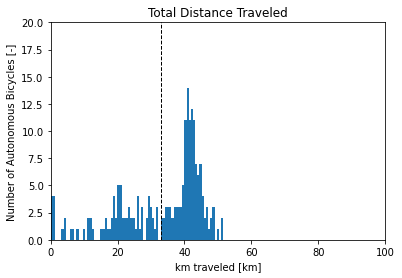

In [ ]:
distance_df.hist('Total Distance Traveled',grid=False,bins=80)
plt.axvline(distance_df['Total Distance Traveled'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('km traveled [km]') 
plt.ylabel('Number of Autonomous Bicycles [-]') 
plt.xlim(0,100)
plt.ylim(0,20)
print(low_percentage,'% of the autonomous bicycles travel less than',km_ab.round(2),'km per day')
print(high_percentage,'% of the autonomous bicycles travel more than',km_ab.round(2),'km per day')

#### Location of low traveling autonomous bicycles

In [ ]:
package_nominal_scenario_df['Package Number'] = package_nominal_scenario_df['Agent'].str.extract('(\d+)').astype(int)

In [ ]:
for i in range(len(low_travel_df)):
  if low_travel_df.at[i,'Activity']=='Delivery':
    package_number = low_travel_df.at[i,'Package Number']
    aux_package = package_nominal_scenario_df[package_nominal_scenario_df['Package Number']==package_number]
    aux_package = aux_package.reset_index().drop('index',axis=1)
    low_travel_df.at[i,'Latitude'] = aux_package.at[0,'Destination [lat]']
    low_travel_df.at[i,'Longitude'] = aux_package.at[0,'Destination [lon]']

In [ ]:
low_travel_df.to_csv('low_travel.csv')

## Total Average Distance Traveled

### Calculation

In [ ]:
n_ab_possible=autonomousBike_trips_df['Num Autonomous Bikes'].unique()
n_ab_possible.sort()
l_n_ab=len(n_ab_possible)

n_s_possible=autonomousBike_trips_df['AB PickUp Speed'].unique()
n_s_possible.sort()
l_n_s=len(n_s_possible)

n_bl_possible=autonomousBike_trips_df['Autonomous Bikes Battery Life'].unique()
n_bl_possible.sort()
l_n_bl=len(n_bl_possible)

autonomousBikes_distance_list = ['Num Autonomous Bikes','Speed','Total Autonomous Bikes','Total trips','Average Distance Traveled']
autonomousBikes_distance_df = pd.DataFrame(columns=autonomousBikes_distance_list)
adt_df = {}

In [ ]:
m_cont = 0
for i in range(l_n_bl):  
  for j in range(l_n_s):

    minimum_fleet=minimum_fleet_df[(minimum_fleet_df['Battery Life']==n_bl_possible[i]) & (minimum_fleet_df['Speed']==(n_s_possible[j]*3.6).round(2))]
    bool_cont = 1

    for k in range(l_n_ab):
      ab_trips=autonomousBike_trips_df[(autonomousBike_trips_df['Autonomous Bikes Battery Life']==n_bl_possible[i]) & (autonomousBike_trips_df['AB PickUp Speed']==n_s_possible[j]) & (autonomousBike_trips_df['Num Autonomous Bikes']==n_ab_possible[k]) ]
      l_ab_trips=len(ab_trips)

      autonomousBikes_distance_df.at[k,'Num Autonomous Bikes']=n_ab_possible[k]
      autonomousBikes_distance_df.at[k,'Speed'] = n_s_possible[j]
      autonomousBikes_distance_df.at[k,'Total Autonomous Bikes'] = len(ab_trips['Agent'].unique())
      autonomousBikes_distance_df.at[k,'Total trips'] = l_ab_trips

      total_km= ab_trips['Distance Traveled'].sum()/1000
      average_km=total_km/len(ab_trips['Agent'].unique())

      autonomousBikes_distance_df.at[k,'Average Distance Traveled'] = average_km

      if bool_cont == 1:
        if (minimum_fleet.at[m_cont,'Num Autonomous Bikes']==n_ab_possible[k]):
          minimum_fleet_df.at[m_cont,'Average Distance Traveled [km]'] = average_km
          m_cont = m_cont + 1
          bool_cont = 0

      average_distance_traveled_df=autonomousBikes_distance_df[['Num Autonomous Bikes','Average Distance Traveled']]
      name_adistancetraveled = "Speed " + str((n_s_possible[j]*3.6).round(2))
      average_distance_traveled_df = average_distance_traveled_df.rename(columns={"Average Distance Traveled": name_adistancetraveled}, errors="raise")

    if j>0:
      extracted_col_adt = average_distance_traveled_df[name_adistancetraveled]
      adt_df[i] = adt_df[i].join(extracted_col_adt)
    else:
      adt_df[i] = average_distance_traveled_df

### Display

In [ ]:
minimum_fleet_df

,Battery Life,Speed,Num Autonomous Bikes,Average Distance Traveled [km]
0,35000.0,8.0,260,28.528951
1,35000.0,11.0,260,27.630174
2,35000.0,14.0,240,33.699529
3,50000.0,8.0,240,29.489919
4,50000.0,11.0,210,37.211921
5,50000.0,14.0,210,38.271394
6,65000.0,8.0,200,35.284108
7,65000.0,11.0,190,40.669892
8,65000.0,14.0,180,41.915322


# DRAFT


## Not Used Post-Processing

### Autonomous bikes charging events

In [ ]:
autonomousBike_charging_df['Start Time']=autonomousBike_charging_df['Start Time'].astype(str)
autonomousBike_charging_df['Start Hour']=autonomousBike_charging_df['Start Time'].str[:2]
autonomousBike_charging_df['Start Hour']=autonomousBike_charging_df['Start Hour'].astype(int)

Text(0, 0.5, 'Number of Charging Trips [-]')

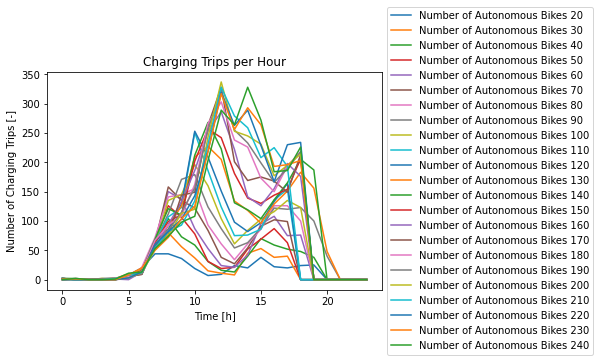

In [ ]:
for i in range(l_n_autonomousBikes):
  charging_trips=autonomousBike_charging_df[(autonomousBike_charging_df['Num Autonomous Bikes']==n_autonomousBikes_possible[i])]

  ctrips_hour=charging_trips.groupby(['Start Hour']).size()
  ctrips_hour_df=pd.DataFrame(ctrips_hour)
  ctrips_hour_df=ctrips_hour_df.rename(columns={0: "Number of Charging Trips"}, errors="raise")
  ctrips_hour_df=ctrips_hour_df.reset_index()

  l_ctrips = len(ctrips_hour_df)
  count_aux = 0
  add_aux = l_ctrips

  for j in range(l_ctrips):
    if count_aux!=ctrips_hour_df.at[j,'Start Hour']:
      ctrips_hour_df.at[add_aux,'Start Hour']=count_aux
      ctrips_hour_df.at[add_aux,'Number of Charging Trips']=0
      ctrips_hour_df=ctrips_hour_df.sort_values(by=['Start Hour']).reset_index().drop('index',axis=1)
      count_aux = count_aux + 1
      add_aux = add_aux + 1
    else:
      count_aux = count_aux + 1

  add_aux = l_ctrips+1

  while len(ctrips_hour_df)!=24:
    ctrips_hour_df.at[add_aux,'Start Hour']=add_aux
    ctrips_hour_df.at[add_aux,'Number of Charging Trips']=0
    add_aux = add_aux + 1

  name_aux = "Number of Autonomous Bikes " + str(n_autonomousBikes_possible[i])

  line,=plt.plot(ctrips_hour_df['Start Hour'],ctrips_hour_df['Number of Charging Trips'])
  line.set_label(name_aux)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
 
plt.title('Charging Trips per Hour')
plt.xlabel('Time [h]') 
plt.ylabel('Number of Charging Trips [-]') 

In [ ]:
charging_list = ['Num Autonomous Bikes','Total trips','Max charging time','Min charging time','Average charging time']
charging_df = pd.DataFrame(columns=charging_list)

In [ ]:
for i in range(l_n_autonomousBikes):

    charging_trips=autonomousBike_charging_df[autonomousBike_charging_df['Num Autonomous Bikes']==n_autonomousBikes_possible[i]]
    l_trips=len(charging_trips)

    charging_df.at[i,'Num Autonomous Bikes'] = n_autonomousBikes_possible[i]
    charging_df.at[i,'Total trips'] = l_trips

    total_charging= charging_trips['Duration (min)'].sum()
    average_charging=total_charging/(charging_trips.shape[0])

    charging_df.at[i,'Average charging time'] = average_charging
    charging_df.at[i,'Max charging time'] = charging_trips['Duration (min)'].max()
    charging_df.at[i,'Min charging time'] = charging_trips['Duration (min)'].min()

,Num Autonomous Bikes,Total trips,Max charging time,Min charging time,Average charging time
0,20,373,263.633333,203.1,216.941823
1,30,527,267.166667,203.0,218.170525
2,40,709,260.766667,202.966667,217.433098
3,50,868,261.4,203.2,217.68245
4,60,1029,268.733333,202.933333,217.392582
5,70,1189,268.7,202.833333,216.946538
6,80,1334,268.766667,203.266667,217.051774
7,90,1470,265.333333,202.833333,217.169955
8,100,1616,266.066667,202.766667,217.061757
9,110,1743,270.0,203.033333,217.451635


In [ ]:
# results_path=Path('/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/AutonomousScenario/2022-09-01 17.45.00/autonomousBike_charging.csv')
# charging_df.to_csv(results_path,index=False)

### Charging Events Results

#### Preliminary Code

In [ ]:
charge_distance_list = ['Num Autonomous Bikes','Battery Life','Total Autonomous Bikes','Total trips','Average Distance Traveled']
charge_distance_df = pd.DataFrame(columns=charge_distance_list)
charging_event_list = ['END: low_battery']
cadt_df = {}
ctt_df = {}
ctab_df = {}

In [ ]:
for i in range(l_n_s):  
  for j in range(l_n_bl):
    for k in range(l_n_ab):
      ab_trips=autonomousBike_trips_df[(autonomousBike_trips_df['AB PickUp Speed']==n_s_possible[i]) & (autonomousBike_trips_df['Autonomous Bikes Battery Life']==n_bl_possible[j]) & (autonomousBike_trips_df['Num Autonomous Bikes']==n_ab_possible[k]) ]
      c_trips = ab_trips[ab_trips['Event'].isin(charging_event_list)].reset_index().drop('index',axis=1)
      l_c_trips=len(c_trips)

      charge_distance_df.at[k,'Num Autonomous Bikes']=n_ab_possible[k]
      charge_distance_df.at[k,'Battery Life'] = n_bl_possible[j]
      charge_distance_df.at[k,'Total Autonomous Bikes'] = len(c_trips['Agent'].unique())
      charge_distance_df.at[k,'Total trips'] = l_c_trips

      total_km = c_trips['Distance Traveled'].sum()/1000
      average_km = total_km/len(c_trips['Agent'].unique())


      charge_distance_df.at[k,'Average Distance Traveled'] = average_km

      charging_average_distance_traveled_df=charge_distance_df[['Num Autonomous Bikes','Average Distance Traveled']]
      name_cadistancetraveled = "Battery Life " + str(n_bl_possible[j]/1000)
      charging_average_distance_traveled_df = charging_average_distance_traveled_df.rename(columns={"Average Distance Traveled": name_cadistancetraveled}, errors="raise")

      charging_totaltrips_df=charge_distance_df[['Num Autonomous Bikes','Total trips']]
      name_ctotaltrips = "Battery Life " + str(n_bl_possible[j]/1000)
      charging_totaltrips_df = charging_totaltrips_df.rename(columns={"Total trips": name_ctotaltrips}, errors="raise")

      charging_totalab_df=charge_distance_df[['Num Autonomous Bikes','Total Autonomous Bikes']]
      name_ctotalab = "Battery Life " + str(n_bl_possible[j]/1000)
      charging_totalab_df = charging_totalab_df.rename(columns={"Total Autonomous Bikes": name_ctotalab}, errors="raise")

    if j>0:
      extracted_col_cadt = charging_average_distance_traveled_df[name_cadistancetraveled]
      cadt_df[i] = cadt_df[i].join(extracted_col_cadt)
      extracted_col_ctt = charging_totaltrips_df[name_ctotaltrips]
      ctt_df[i] = ctt_df[i].join(extracted_col_ctt)
      extracted_col_ctab = charging_totalab_df[name_ctotalab]
      ctab_df[i] = ctab_df[i].join(extracted_col_ctab)
    else:
      cadt_df[i] = charging_average_distance_traveled_df
      ctt_df[i] = charging_totaltrips_df
      ctab_df[i] = charging_totalab_df

#### Charging Event Average Distance Traveled

In [ ]:
for i in range (l_n_s):
  plt.figure()
  cadt_aux_df = cadt_df[i]
  
  for j in range(l_n_bl):

    name_cadistancetraveled = "Battery Life " + str(n_bl_possible[j]/1000) 

    line,=plt.plot(cadt_aux_df['Num Autonomous Bikes'],cadt_aux_df[name_cadistancetraveled])
    line.set_label(name_cadistancetraveled + " km")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

  title_aux = "Charging Average Distance: Speed " + str((n_s_possible[i]*3.6).round(2)) + " km/h" 
  plt.title(title_aux)
  plt.xlabel('Number of Autonomous Bikes [-]') 
  plt.ylim([0, 1.6]) 
  plt.ylabel('Average Distance Traveled [km]') 

#### Charging Total Trips

In [ ]:
for i in range (l_n_bl):
  plt.figure()
  ctt_aux_df = ctt_df[i]
  
  for j in range(l_n_s):

    name_ctotaltrips = "Battery Life " + str(n_bl_possible[j]/1000)

    line,=plt.plot(ctt_aux_df['Num Autonomous Bikes'],ctt_aux_df[name_ctotaltrips])
    line.set_label(name_ctotaltrips + " km")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

  title_aux = "Charging Total Trips: Speed " + str((n_s_possible[i]*3.6).round(2)) + " km/h" 
  plt.title(title_aux)
  plt.xlabel('Number of Autonomous Bikes [-]') 
  plt.ylim([0,400]) 
  plt.ylabel('Charging Total Trips [-]') 

#### Autonomous Bikes with Charging Events

In [ ]:
for i in range (l_n_bl):
  plt.figure()
  ctab_aux_df = ctab_df[i]
  
  for j in range(l_n_s):

    name_ctotalab = "Battery Life " + str(n_bl_possible[j]/1000)

    line,=plt.plot(ctab_aux_df['Num Autonomous Bikes'],ctab_aux_df[name_ctotalab])
    line.set_label(name_ctotalab + " km")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

  title_aux = "Number of Autonomous Bikes to Charge: Speed " + str((n_s_possible[i]*3.6).round(2)) + " km/h" 
  plt.title(title_aux)
  plt.xlabel('Number of Autonomous Bikes [-]') 
  plt.ylim([0,160]) 
  plt.ylabel('Number of Autonomous Bikes to Charge [-]') 

## Package Events || Trips Served

### PickUp & Riding Speed in X axis

In [ ]:
n_pickupspeed_possible_df=pd.DataFrame(n_pickupspeed_possible)
aux_array = pd.array(['Event Description / PickUp Speed'])
aux_array_df = pd.DataFrame(aux_array)
aux_array_df = pd.concat([aux_array_df,n_pickupspeed_possible_df])
aux_array_df = aux_array_df.rename(columns={0: "Index"}, errors="raise")

In [ ]:
package_events_analysis_df = pd.DataFrame(columns=aux_array_df['Index'])
package_events_analysis_df['Event Description / PickUp Speed']=package_events_df['Event'].unique()
package_events_analysis_df.at[14,'Event Description / PickUp Speed'] = 'Percentage of trips served: '

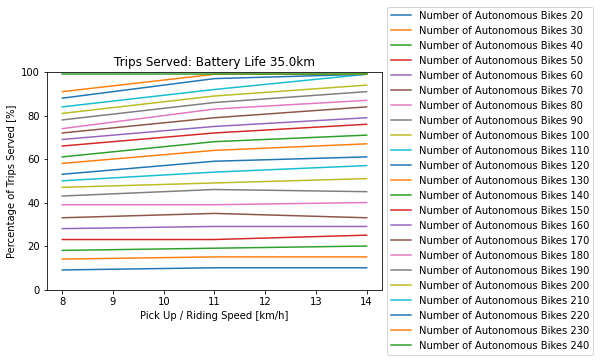

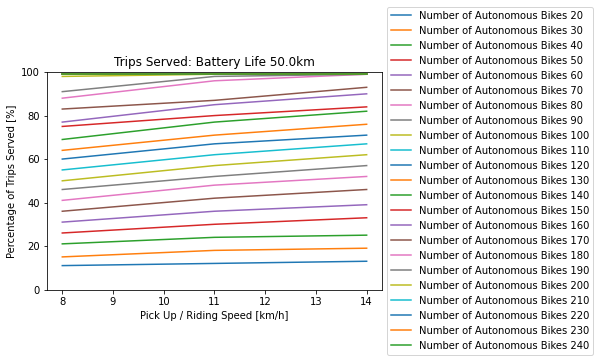

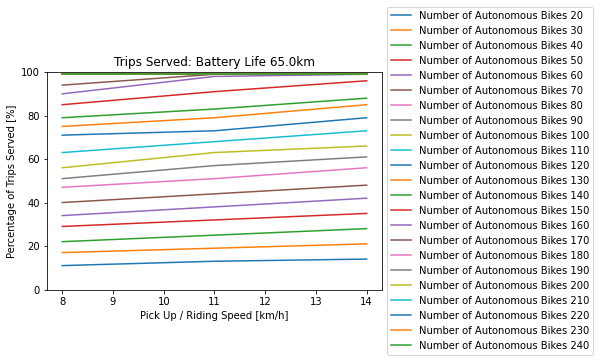

In [ ]:
for k in range(l_n_batterylife_possible):
  plt.figure()
  for i in range(l_n_autonomousBikes):
    for j in range (l_n_pickupspeed_possible):
      p_trips=package_events_df[(package_events_df['Num Autonomous Bikes']==n_autonomousBikes_possible[i]) & (package_events_df['AB PickUp Speed']==n_pickupspeed_possible[j]) & (package_events_df['Autonomous Bikes Battery Life']==n_batterylife_possible[k])]
      lp_trips=len(p_trips)

      li = list(p_trips['Agent'].value_counts())

      events_count = p_trips['Event'].value_counts()
      events_count = pd.DataFrame(events_count).reset_index()
      events_count = events_count.rename(columns={"index": "Event Description / PickUp Speed"}, errors="raise")
    

      trips_served = events_count.at[13,'Event']
      total_trips = len(li)
      p_trips_served = trips_served/total_trips*100

      events_count.at[14,'Event Description / PickUp Speed'] = 'Percentage of trips served: '
      events_count.at[14,'Event'] = p_trips_served

      served_trips_df.at[j,'% trips served'] = p_trips_served

      package_events_analysis_df[n_pickupspeed_possible[j]]=events_count['Event']
      package_events_analysis_df=package_events_analysis_df.round(2)

      p_events_transp = package_events_analysis_df.transpose()
      p_events_transp = p_events_transp.reset_index()

      headers = p_events_transp.iloc[0]
      new_p_events_transp  = pd.DataFrame(p_events_transp.values[1:], columns=headers)

    package_aux = new_p_events_transp[['Event Description / PickUp Speed','Percentage of trips served: ']]
    name_aux = "Number of Autonomous Bikes " + str(n_autonomousBikes_possible[i])
    package_aux = package_aux.rename(columns={"Percentage of trips served: ": name_aux}, errors="raise")
    package_aux['Event Description / PickUp Speed']=package_aux['Event Description / PickUp Speed']*3.6

    if i>0:
      extracted_col = package_aux[name_aux]
      trips_served_df = trips_served_df.join(extracted_col)
    else:
      trips_served_df = package_aux

    line,=plt.plot(trips_served_df['Event Description / PickUp Speed'],trips_served_df[name_aux])
    line.set_label(name_aux)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

  title_aux = "Trips Served: Battery Life " + str(n_batterylife_possible[k]/1000) + "km"
  plt.ylim([0, 100]) 
  plt.title(title_aux)
  plt.xlabel('Pick Up / Riding Speed [km/h]') 
  plt.ylabel('Percentage of Trips Served [%]')

## Package Events || Quality of the Service


### PickUp & Riding Speed in X Axis

#### Preliminary Code

In [ ]:
awt_df = {}
lt_df = {}
mwt_df = {}

In [ ]:
for k in range(l_n_batterylife_possible):
  for i in range(l_n_autonomousBikes):
    for j in range(l_n_pickupspeed_possible):
      p_trips=package_trips_df[(package_trips_df['Num Autonomous Bikes']==n_autonomousBikes_possible[i]) & (package_trips_df['AB PickUp Speed']==n_pickupspeed_possible[j]) & (package_trips_df['Autonomous Bikes Battery Life']==n_batterylife_possible[k])]
      l_trips=len(p_trips)

      quality_of_service_df.at[j,'Num Autonomous Bikes']=n_autonomousBikes_possible[i]
      quality_of_service_df.at[j,'PickUp Speed'] = n_pickupspeed_possible[j]
      quality_of_service_df.at[j,'Total packages'] = len(package_events_df['Agent'].unique())
      quality_of_service_df.at[j,'Total trips'] = l_trips

      package_trips_ontime = p_trips.loc[(p_trips['Total Time (min)']<= 40)]
      package_trips_late = p_trips.loc[(p_trips['Total Time (min)']> 40)]

      quality_of_service_df.at[j,'On time trips'] = package_trips_ontime.shape[0]
      quality_of_service_df.at[j,'Late trips'] = package_trips_late.shape[0]

      ontime_pct=package_trips_ontime.size/p_trips.size*100
      late_pct=package_trips_late.size/p_trips.size*100

      quality_of_service_df.at[j,'% On time trips'] = ontime_pct
      quality_of_service_df.at[j,'% Late trips'] = late_pct

      total_wait= p_trips['Total Time (min)'].sum()
      average_wait=total_wait/(p_trips.shape[0])
      median_wait=statistics.median(p_trips['Total Time (min)'])

      quality_of_service_df.at[j,'Average wait time'] = average_wait
      quality_of_service_df.at[j,'Median wait time'] = median_wait
      quality_of_service_df.at[j,'Max wait time'] = p_trips['Total Time (min)'].max()
      quality_of_service_df.at[j,'Min wait time'] = p_trips['Total Time (min)'].min()

      quality_of_service_df=quality_of_service_df.round(2)

      average_wait_time_df=quality_of_service_df[['PickUp Speed','Average wait time']]
      name_waittime = "Number of Autonomous Bikes " + str(n_autonomousBikes_possible[i])
      average_wait_time_df = average_wait_time_df.rename(columns={"Average wait time": name_waittime}, errors="raise")
      average_wait_time_df['PickUp Speed']=average_wait_time_df['PickUp Speed']*3.6

      latetrips_df=quality_of_service_df[['PickUp Speed','% Late trips']]
      name_latetrips = "Number of Autonomous Bikes " + str(n_autonomousBikes_possible[i])
      latetrips_df = latetrips_df.rename(columns={"% Late trips": name_waittime}, errors="raise")
      latetrips_df['PickUp Speed']=latetrips_df['PickUp Speed']*3.6

      median_wait_time_df=quality_of_service_df[['PickUp Speed','Median wait time']]
      name_mwaittime = "Number of Autonomous Bikes " + str(n_autonomousBikes_possible[i])
      median_wait_time_df = median_wait_time_df.rename(columns={"Median wait time": name_mwaittime}, errors="raise")
      median_wait_time_df['PickUp Speed']=median_wait_time_df['PickUp Speed']*3.6

    if i>0:
      extracted_col = average_wait_time_df[name_waittime]
      awt_df[k] = awt_df[k].join(extracted_col)
      extracted_col_lt = latetrips_df[name_latetrips]
      lt_df[k] = lt_df[k].join(extracted_col_lt)
      extracted_col_mwt = median_wait_time_df[name_waittime]
      mwt_df[k] = mwt_df[k].join(extracted_col_mwt)
    else:
      awt_df[k] = average_wait_time_df
      lt_df[k] = latetrips_df
      mwt_df[k] = median_wait_time_df

#### Average Wait Time

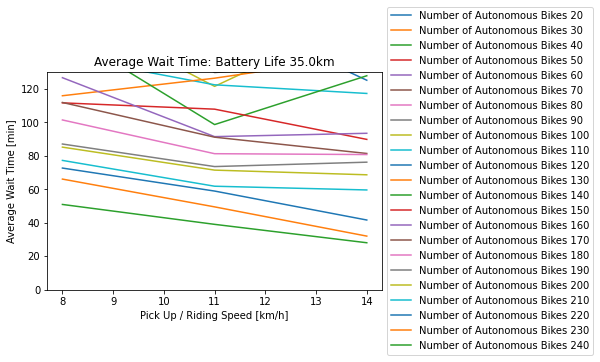

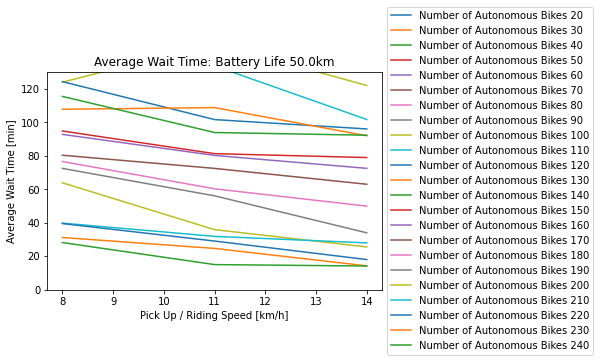

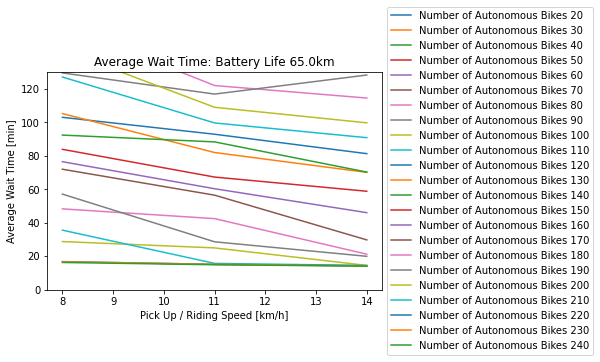

In [ ]:
for i in range (l_n_batterylife_possible):
  plt.figure()
  awt_aux_df = awt_df[i]
  for j in range(l_n_autonomousBikes):

    name_waittime = "Number of Autonomous Bikes " + str(n_autonomousBikes_possible[j])

    line,=plt.plot(awt_aux_df['PickUp Speed'],awt_aux_df[name_waittime])
    line.set_label(name_waittime)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

  title_aux = "Average Wait Time: Battery Life " + str(n_batterylife_possible[i]/1000) + "km"
  plt.title(title_aux)
  plt.xlabel('Pick Up / Riding Speed [km/h]') 
  plt.ylim([0, 130]) 
  plt.ylabel('Average Wait Time [min]') 

#### Median Wait Time

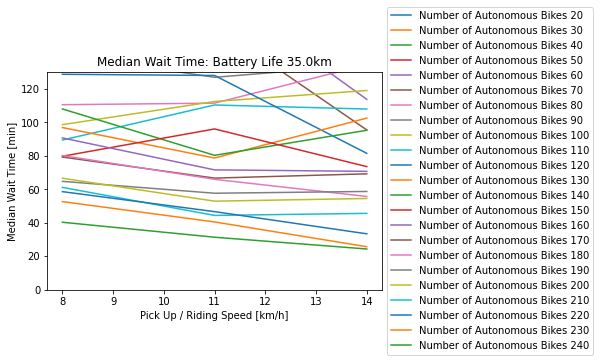

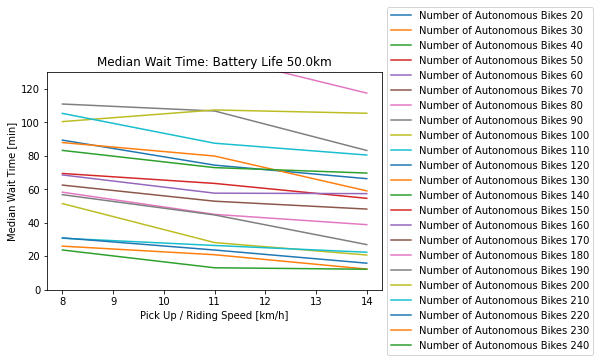

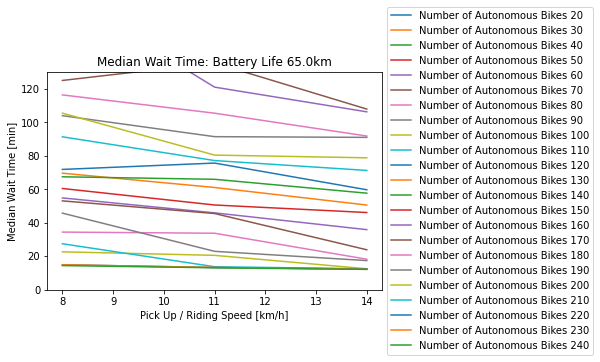

In [ ]:
for i in range (l_n_batterylife_possible):
  plt.figure()
  mwt_aux_df = mwt_df[i]
  for j in range(l_n_autonomousBikes):

    name_mwt = "Number of Autonomous Bikes " + str(n_autonomousBikes_possible[j])

    line,=plt.plot(mwt_aux_df['PickUp Speed'],mwt_aux_df[name_mwt])
    line.set_label(name_mwt)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

  title_aux = "Median Wait Time: Battery Life " + str(n_batterylife_possible[i]/1000) + "km"  
  plt.title(title_aux)
  plt.xlabel('Pick Up / Riding Speed [km/h]') 
  plt.ylim([0, 130]) 
  plt.ylabel('Median Wait Time [min]') 

#### Percentage of Late Trips

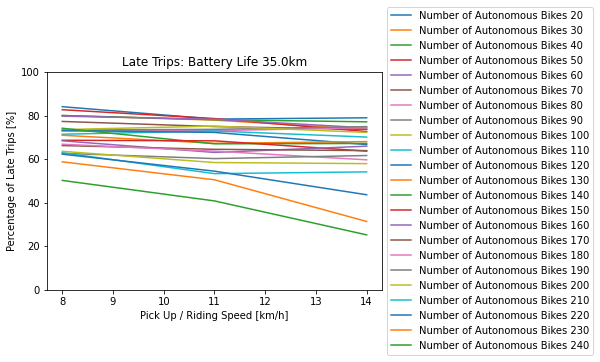

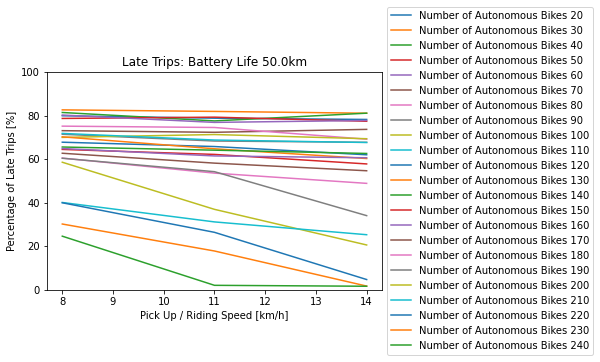

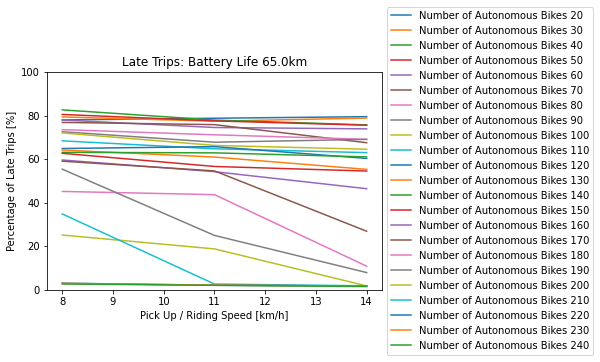

In [ ]:
for i in range (l_n_batterylife_possible):
  plt.figure()
  lt_aux_df = lt_df[i]
  for j in range(l_n_autonomousBikes):

    name_latetrips = "Number of Autonomous Bikes " + str(n_autonomousBikes_possible[j])

    line,=plt.plot(lt_aux_df['PickUp Speed'],lt_aux_df[name_latetrips])
    line.set_label(name_latetrips)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

  title_aux = "Late Trips: Battery Life " + str(n_batterylife_possible[i]/1000) + "km"  
  plt.ylim([0, 100])  
  plt.title(title_aux)
  plt.xlabel('Pick Up / Riding Speed [km/h]') 
  plt.ylabel('Percentage of Late Trips [%]') 

## Package Event Draft


In [ ]:
package_events_df=package_events_df.sort_values(by=['Num Autonomous Bikes','Time']).reset_index().drop('index',axis=1)

In [ ]:
served_trips_df = pd.DataFrame(n_autonomousBikes_possible)
served_trips_df=served_trips_df.rename(columns={0: "Num Autonomous Bikes"}, errors="raise")
served_trips_df['% trips served']=' '

In [ ]:
for i in range(l_n_autonomousBikes):
    p_trips=package_events_df[package_events_df['Num Autonomous Bikes']==n_autonomousBikes_possible[i]]
    lp_trips=len(p_trips)

    li = list(p_trips['Agent'].value_counts())
    print("Nº packages :", len(li))

    # total_km= p_trips['Distance Traveled'].sum()/1000
    # print("Total km: ", total_km)

    # km_package=total_km/len(li)
    # print("Avg km/car: ", km_car)


    events_count = p_trips['Event'].value_counts()
    events_count=pd.DataFrame(events_count).reset_index()
    events_count=events_count.rename(columns={"index": "Event_Description"}, errors="raise")
    print(events_count)

    trips_served = events_count.at[13,'Event']
    total_trips = len(li)
    p_trips_served = trips_served/total_trips*100

    served_trips_df.at[i,'% trips served'] = p_trips_served

    print('Percentage of trips served: ', p_trips_served)

    print("\n")

Nº packages : 3076
                           Event_Description  Event
0                                 START: end   3184
1                                   END: end   3076
2                START: choosingDeliveryMode   3076
3                  END: choosingDeliveryMode    327
4   START: requesting_autonomousBike_Package    327
5     END: requesting_autonomousBike_Package    123
6                           START: firstmile    123
7                             END: firstmile    123
8     START: awaiting_autonomousBike_Package    123
9       END: awaiting_autonomousBike_Package    115
10          START: delivering_autonomousBike    115
11            END: delivering_autonomousBike    108
12                           START: lastmile    108
13                             END: lastmile    108
Percentage of trips served:  3.5110533159947983


Nº packages : 3076
                           Event_Description  Event
0                                 START: end   3261
1                           

In [ ]:
served_trips_df

,Num Autonomous Bikes,% trips served
0,20,3.511053
1,40,6.014304
2,60,10.338101
3,80,12.646294
4,100,15.79974
5,120,19.473342
6,140,21.228869
7,160,24.96749
8,180,28.673602
9,200,33.289987


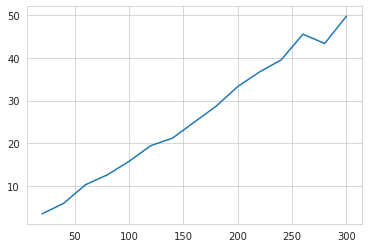

In [ ]:
plt.plot(served_trips_df['Num Autonomous Bikes'],served_trips_df['% trips served'])

## Charging Event Draft


### Draft

In [ ]:
for i in range(l_n_bl):  
  for j in range(l_n_s):
    for k in range(l_n_ab):
      ab_trips=autonomousBike_trips_df[autonomousBike_trips_df['Num Autonomous Bikes']==n_autonomousBikes_possible[i]]
      lab_trips=len(ab_trips)

      li = list(ab_trips['Agent'].value_counts())
      print("Nº autonomous bikes :", len(li))

      total_km= ab_trips['Distance Traveled'].sum()/1000
      print("Total km: ", total_km)

      km_autonmousBike=total_km/len(li)
      print("Avg km/autonomous bike: ", km_autonmousBike)


      events_count = ab_trips['Event'].value_counts()
      print(events_count)

      print("\n") 

Nº autonomous bikes : 20
Total km:  28459.44946658109
Avg km/autonomous bike:  1422.9724733290545
START: wandering              10555
END: wandering                10555
START: picking_up_packages     9672
END: picking_up_packages       9555
START: in_use_packages         9555
END: in_use_packages           9497
START: low_battery              883
END: low_battery                879
START: getting_charge           879
END: getting_charge             879
Name: Event, dtype: int64


Nº autonomous bikes : 40
Total km:  52791.94195234197
Avg km/autonomous bike:  1319.7985488085492
START: wandering              20612
END: wandering                20612
START: picking_up_packages    18976
END: picking_up_packages      18755
START: in_use_packages        18754
END: in_use_packages          18629
START: low_battery             1634
END: low_battery               1627
START: getting_charge          1627
END: getting_charge            1626
Name: Event, dtype: int64


Nº autonomous bikes : 60
Tot

Number of autonomous bikes:  320
Wandering:  0.0
Charge:  0.0
Picking-up:  2530948.8380234353
Use:  1413788.0788676962
TOTAL:  3944736.9168911316


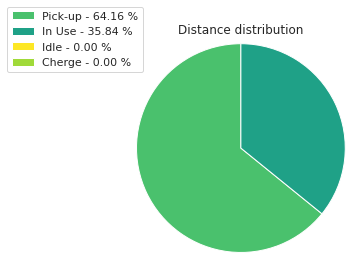

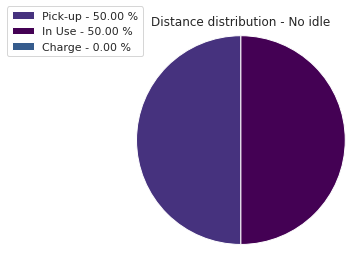

Number of autonomous bikes:  340
Wandering:  0.0
Charge:  0.0
Picking-up:  2565678.894395898
Use:  1495467.5537448316
TOTAL:  4061146.4481407297


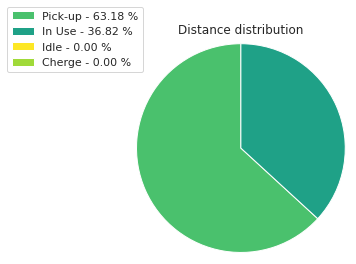

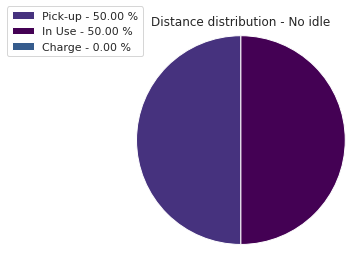

Number of autonomous bikes:  360
Wandering:  0.0
Charge:  0.0
Picking-up:  2713432.3302412443
Use:  1524819.379900508
TOTAL:  4238251.710141752


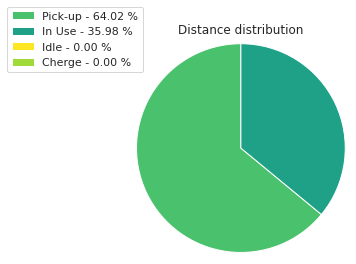

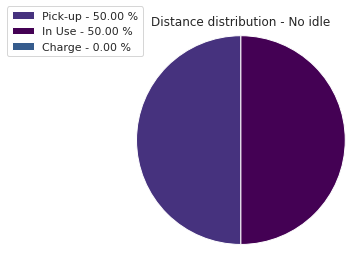

Number of autonomous bikes:  380
Wandering:  0.0
Charge:  0.0
Picking-up:  2918166.40461041
Use:  1776140.410839221
TOTAL:  4694306.815449631


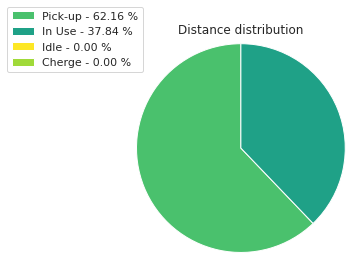

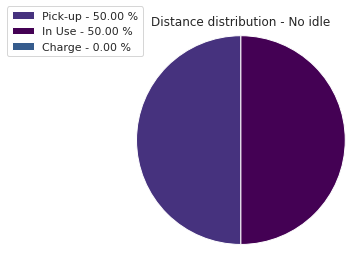

Number of autonomous bikes:  400
Wandering:  0.0
Charge:  0.0
Picking-up:  3004527.1565380823
Use:  1841603.761015785
TOTAL:  4846130.917553867


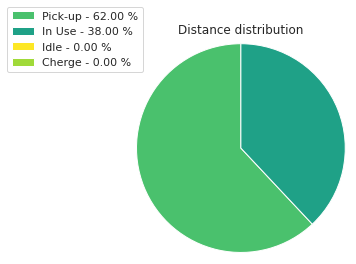

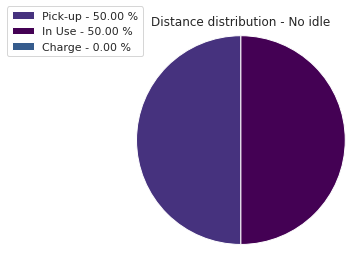

Number of autonomous bikes:  420
Wandering:  0.0
Charge:  0.0
Picking-up:  3101361.747226315
Use:  2013874.3005140861
TOTAL:  5115236.047740402


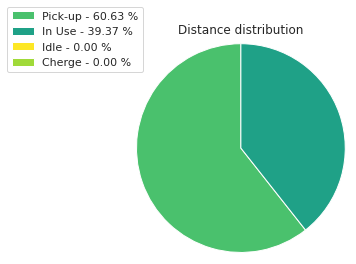

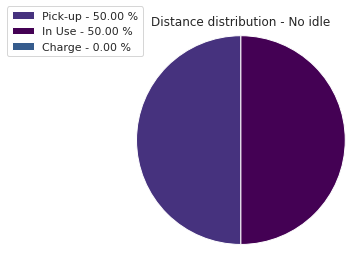

Number of autonomous bikes:  440
Wandering:  0.0
Charge:  0.0
Picking-up:  3051548.7053968436
Use:  2148345.2013378297
TOTAL:  5199893.906734673


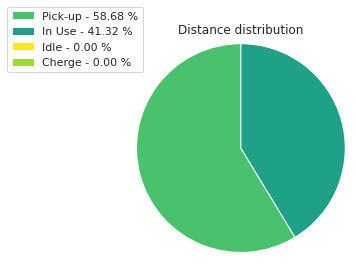

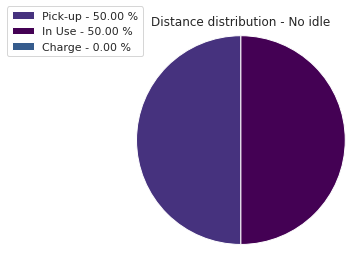

Number of autonomous bikes:  460
Wandering:  0.0
Charge:  0.0
Picking-up:  3164907.880193484
Use:  1990563.1773848196
TOTAL:  5155471.057578304


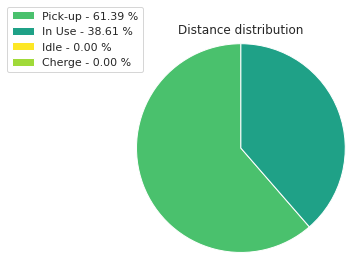

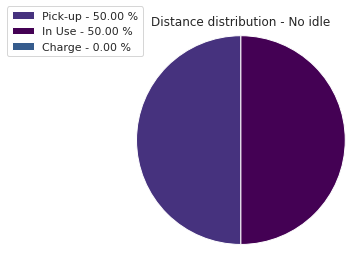

Number of autonomous bikes:  480
Wandering:  0.0
Charge:  0.0
Picking-up:  3518510.5307595558
Use:  2524180.760690706
TOTAL:  6042691.291450262


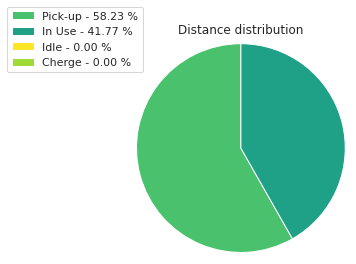

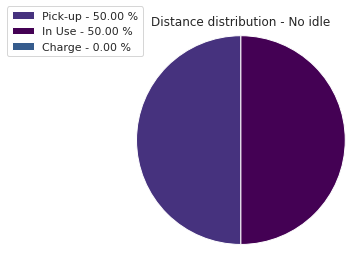

Number of autonomous bikes:  500
Wandering:  0.0
Charge:  0.0
Picking-up:  3582251.8105378742
Use:  2428907.0694106454
TOTAL:  6011158.879948519


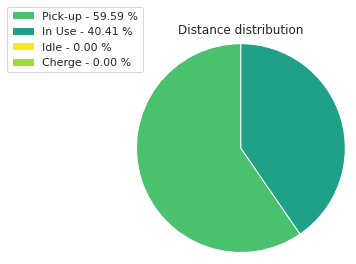

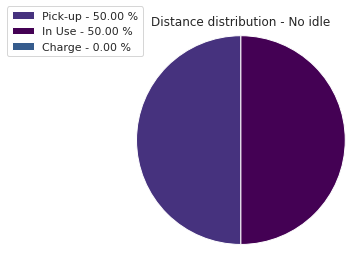

In [ ]:
for i in range(l_n_autonomousBikes):
    ab_trips=autonomousBike_trips_df[autonomousBike_trips_df['Num Autonomous Bikes']==n_autonomousBikes_possible[i]]
    lab_trips=len(ab_trips)

    print("Number of autonomous bikes: ",n_autonomousBikes_possible[i])
    
    idle=ab_trips.loc[(ab_trips['Event']== 'END: wandering')]
    idle_start=ab_trips.loc[(ab_trips['Event']== 'START: wandering')]
    idle_dist=idle['Distance Traveled'].sum()
    print('Wandering: ', idle_dist)

    charge=ab_trips.loc[(ab_trips['Event']== 'END: getting_charge')]
    charge_start=ab_trips.loc[(ab_trips['Event']== 'START: getting_charge')]
    charge_dist=charge['Distance Traveled'].sum()
    print('Charge: ', charge_dist)

    pick=ab_trips.loc[(ab_trips['Event']== 'END: picking_up_packages')]
    pick_start=ab_trips.loc[(ab_trips['Event']== 'START: picking_up_packages')]
    pick_dist=pick['Distance Traveled'].sum()
    print('Picking-up: ', pick_dist)

    use=ab_trips.loc[(ab_trips['Event']== 'END: in_use_packages')]
    use_start=ab_trips.loc[(ab_trips['Event']== 'START: in_use_packages')]
    use_dist=use['Distance Traveled'].sum()
    print('Use: ', use_dist)

    total_dist=idle_dist+charge_dist+pick_dist+use_dist
    print('TOTAL: ', total_dist)

    labels = 'Idle','Charge', 'Pick-up', 'In Use'
    sizes = [idle_dist, charge_dist, pick_dist, use_dist]

    color = ['#fde725','#a0da39','#4ac16d','#1fa187']

    #Plotting distance distibution
    x_d = 'Idle','Cherge','Pick-up','In Use'
    y_d = [idle_dist,charge_dist,pick_dist,use_dist]

    y_total=idle_dist+charge_dist+pick_dist+use_dist
    y_perc = y_d/y_total
    patches, texts = plt.pie(y_d, colors=color, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x_d, y_perc*100)]
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y_d),
                                              key=lambda x_d: x_d[2],
                                              reverse=True))
    plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.6, 1.),
              fontsize=11)
    plt.title('Distance distribution')
    plt.show();

    color2 = ['#365c8d','#46327e','#440154']

    x_d2 = 'Charge', 'Pick-up', 'In Use'
    y_d2=[charge_dist, pick_dist, pick_dist]

    y_2total=charge_dist+pick_dist+pick_dist
    y_2perc = y_d2/y_2total
    patches2, texts2 = plt.pie(y_d2, colors=color2, startangle=90, radius=1.2)
    labels2 = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x_d2, y_2perc*100)]
    sort_legend = True
    if sort_legend:
        patches2, labels2, dummy2 =  zip(*sorted(zip(patches2, labels2, y_d2),
                                              key=lambda x_d2: x_d2[2],
                                              reverse=True))
    plt.legend(patches2, labels2, loc='center left', bbox_to_anchor=(-0.6, 1.),
              fontsize=11)
    plt.title('Distance distribution - No idle')
    plt.show();

Number of autonomous bikes:  20


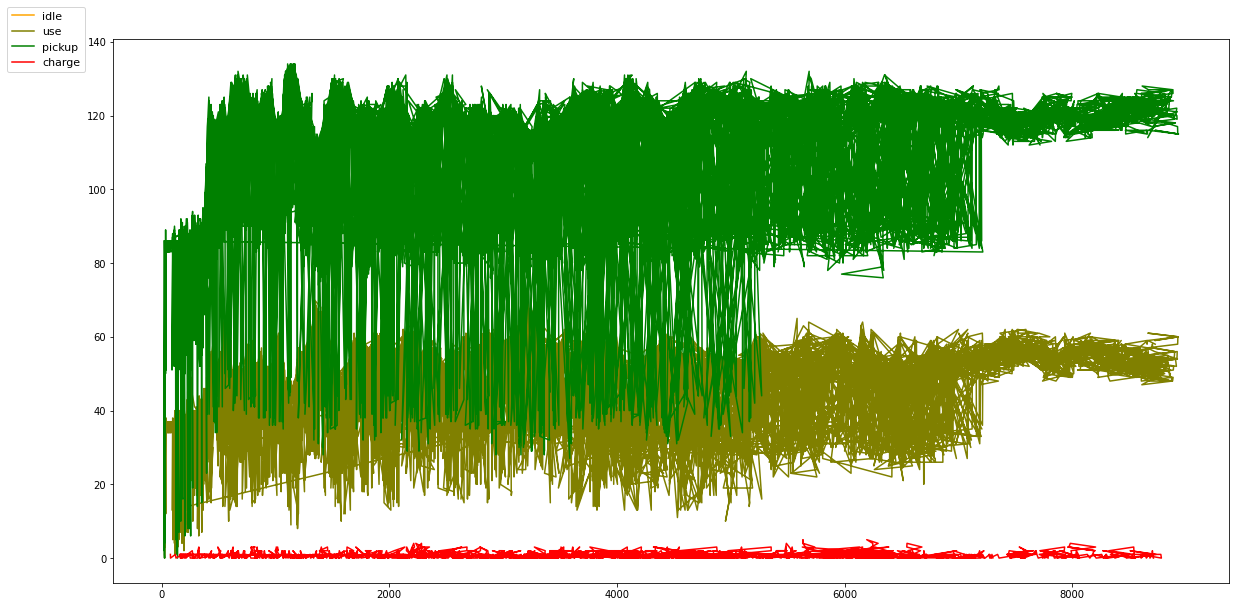

Number of autonomous bikes:  40


KeyboardInterrupt: ignored

In [ ]:
for i in range(l_n_autonomousBikes):
    ab_trips=autonomousBike_trips_df[autonomousBike_trips_df['Num Autonomous Bikes']==n_autonomousBikes_possible[i]]
    lab_trips=len(ab_trips)

    print("Number of autonomous bikes: ",n_autonomousBikes_possible[i])

    #Idle
    idle=ab_trips.loc[(ab_trips['Event']== 'END: end') | (ab_trips['Event']== 'START: end')]
    df=idle
    count=0

    idle_count = pd.DataFrame(columns=['Time', 'Count'])
        
    for i,row in df.iterrows():
        
        event = row["Event"]
        if event == 'END: end':
            count=count-1
        elif event== 'START: end':
            count=count+1
        else:
            print('Event type error')
        idle_count.loc[i] = [i] + [count]

    #Charge
    charging=ab_trips.loc[(ab_trips['Event']== 'END: getting_charge') | (ab_trips['Event']== 'START: getting_charge')]
    df=charging
    count=0

    charging_count = pd.DataFrame(columns=['Time', 'Count'])
        
    for i,row in df.iterrows():
        
        event = row["Event"]
        if event == 'END: getting_charge':
            count=count-1
        elif event== 'START: getting_charge':
            count=count+1
        else:
            print('Event type error')
        charging_count.loc[i] = [i] + [count]

    #Pick
    pick=ab_trips.loc[(ab_trips['Event']== 'END: picking_up_packages') | (ab_trips['Event']== 'START: picking_up_packages')]
    df=pick
    count=0

    pick_count = pd.DataFrame(columns=['Time', 'Count'])
        
    for i,row in df.iterrows():
        
        event = row["Event"]
        if event == 'END: picking_up_packages':
            count=count-1
        elif event== 'START: picking_up_packages':
            count=count+1
        else:
             print('Event type error')
        pick_count.loc[i] = [i] + [count]

    #Use

    use=ab_trips.loc[(ab_trips['Event']== 'END: in_use_packages') | (ab_trips['Event']== 'START: in_use_packages')]
    df=use
    count=0

    use_count = pd.DataFrame(columns=['Time', 'Count'])
        
    for i,row in df.iterrows():
        
        event = row["Event"]
        if event == 'END: in_use_packages':
            count=count-1
        elif event== 'START: in_use_packages':
            count=count+1
        else:
            print('Event type error')
        use_count.loc[i] = [i] + [count]

    plt.figure(figsize=(20,10))
    plt.plot( 'Time', 'Count', data=idle_count,   color='orange', label="idle")
    plt.plot( 'Time', 'Count', data=use_count, color='olive', label="use")
    plt.plot( 'Time', 'Count', data=pick_count,   color='green', label="pickup")
    plt.plot( 'Time', 'Count', data=charging_count,   color='red', label="charge")
    plt.legend( loc='center left', bbox_to_anchor=(-0.1, 1.),
              fontsize=11)
    plt.show()